# This is the test the FFT

In [1]:
cc=299792458      # m/s
using PyPlot
using Distributions
using Dates
#using ControlSystems
using FFTW
using JLD
using DelimitedFiles
using SpecialFunctions
using LsqFit

# Eignmode solver

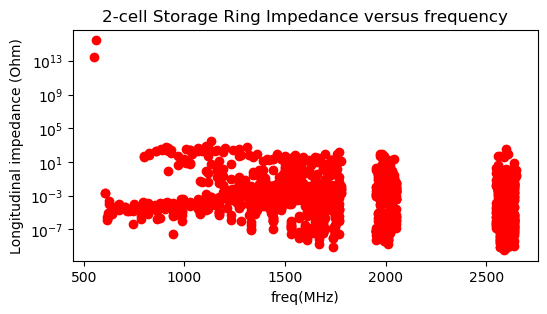

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[2]:22
└ @ Core In[2]:22


PyObject Text(24.00000000000002, 0.5, 'Longitudinal impedance (Ohm)')

In [2]:
#HOMdata=readdlm("HOMdata_RR2Cv1142_binping22.txt")
#HOMdata1=readdlm("HOMdata_RR2Cv1142_binping.txt")
HOMdata=readdlm("HOMdata_RR2Cv1142_kolb22-digits.txt")

freq1 = HOMdata[:,1]*1e9

Crev=3833.845;frf=cc/Crev*315*24
#freq=freq1*(frf/freq1[2])
freq=freq1
Qext = HOMdata[:,2]
RoQlongi = HOMdata[:,3]
Zimplong = Qext.*RoQlongi
#ZohmTrans=HOMdata[:,4].*HOMdata[:,2]

#Pkg.add("PyPlot")


fig=figure(figsize=(6,3))

plot(freq/1e6, Zimplong,"ro")
ax = gca() 
ax[:set_yscale]("log") 
#ax.set_yscale("log", nonposx='clip')
# Legend the plot
#ax(650:1000)

title("2-cell Storage Ring Impedance versus frequency")
xlabel("freq(MHz)")
ylabel("Longitudinal impedance (Ohm)")
#len(HOMdata)

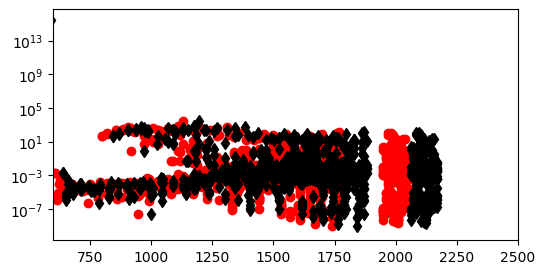

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[3]:14
└ @ Core In[3]:14


(600, 2500)

In [3]:
freq20 = HOMdata[:,1]*1e9

Crev=3833.845;frf=cc/Crev*315*24
freq2=freq20*(frf/freq20[2])

Qext2 = HOMdata[:,2]
RoQlongi2 = HOMdata[:,3];
Zimplong2 = Qext2.*RoQlongi2

fig=figure(figsize=(6,3))
#plot(freq2/1e6, Zimplong2,"kd")
plot(freq/1e6, Zimplong,"ro",freq2/1e6, Zimplong2,"kd")
ax = gca() 
ax[:set_yscale]("log") 
xlim(600,2500)

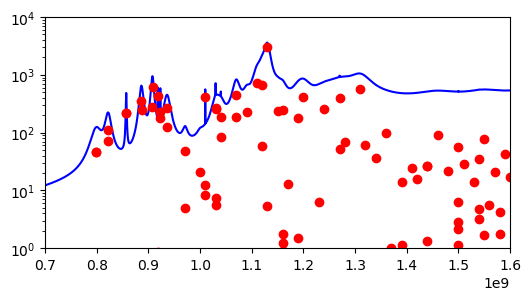

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[695]:14
└ @ Core In[695]:14


(1, 10000.0)

In [695]:
function FittedImp(f)
    sum=0
    for j = 1:length(freq)
        sum=sum+Zimplong[j]/(1+(Qext[j]*(freq[j]/f-f/freq[j]))*1im)
    end
    return sum
end

fig=figure(figsize=(6,3))
f =5e8:0.001e6:3.0e9;
Fit_imp=map(f->real(FittedImp(f)),f)
plot(f,Fit_imp,"b-",freq,Zimplong,"ro")
ax = gca() 
ax[:set_yscale]("log") 
xlim(0.7e9,1.6e9)
ylim(1,1e4)

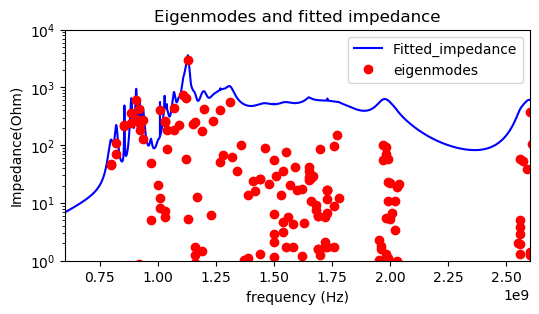

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[696]:11
└ @ Core In[696]:11


(1, 10000.0)

In [696]:
fig=figure(figsize=(6,3))
f =5e8:0.001e6:3.0e9;

plot(f,Fit_imp,"b-",label="Fitted_impedance")
plot(freq,Zimplong,"ro",label="eigenmodes")
ax = gca() 
legend()
title("Eigenmodes and fitted impedance")
xlabel("frequency (Hz)")
ylabel("Impedance(Ohm)")
ax[:set_yscale]("log") 
xlim(0.6e9,2.6e9)
ylim(1,1e4)

# Single mode

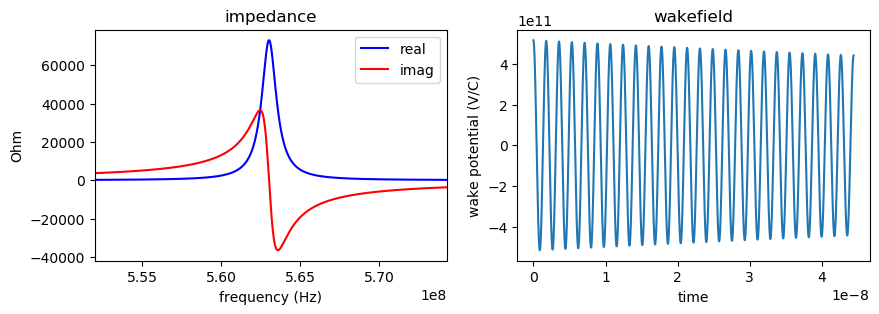

5.164774599794896e11

In [4]:
# Single mode Impedance and wake
Crev=3833.845;frev=cc/Crev
omegarf=2*pi*frev*360*20
RoQ2cell=146
function Zimp_func(RoQ,Qe,wf)
    omega0=omegarf
    return RoQ*Qe/(1+1im*Qe*(wf/omega0-omega0/wf))
end
fig=figure(figsize=(10,3))
subplot(121)
wf=omegarf/1.02:omegarf/100000:1.02*omegarf
plot(wf/2pi,map(x->real(Zimp_func(RoQ2cell,5e2,x)),wf),"b-",label="real")
plot(wf/2pi,map(x->imag(Zimp_func(RoQ2cell,5e2,x)),wf),"r-",label="imag")
xlim(omegarf/1.02/2pi,1.02omegarf/2pi)
title("impedance")
xlabel("frequency (Hz)")
ylabel("Ohm")
legend()

function wakemode(omega0,RoQ,Qe,t)
    tau0=2*Qe/omega0
    Q1=sqrt(1-1/Qe^2)
    Q2=1/sqrt(4*Qe^2-1)
    aa=cos(omega0*Q1*t)
    bb=Q2*sin(omega0*Q1*t)
    return omega0*RoQ*exp(-t/tau0)*(aa-bb)
end
subplot(122)
t=0:2pi/omegarf/10000:100pi/omegarf/2
wt=map(x->wakemode(omegarf,RoQ2cell,5e2,x),t)
plot(t,wt)
title("wakefield")
xlabel("time")
ylabel("wake potential (V/C)")
omegarf*RoQ2cell

In [5]:
#Resample the wakefield and FFT of the wakefield
dt=2pi/omegarf/10^4
t=0:dt:9000pi/omegarf/2
wt=map(x->wakemode(omegarf,RoQ2cell,5e2,x),t)

#Resample the wakefield and FFT of the wakefield
   wakeSinput=t*cc
   Nsample_input=length(wakeSinput)
   Nsampling=2^25
   dt_wake=wakeSinput[20]-wakeSinput[19]
   ST_input=(Nsample_input-1)*dt_wake
   ST=(Nsampling-1)*dt_wake
   ResampleWake=zeros(Nsampling);

   x_wake = (0.0:dt_wake:(Nsample_input-1)*dt_wake)
###padding
   Npadding=Nsampling-length(wakeSinput);wakefieldpadding=zeros(Npadding)

   ysample_input=wt

#define cos window
Coswindow=zeros(Nsample_input)
Coswindow=map(x->cos(x/ST_input*pi/2),x_wake)
ycoswindow=ysample_input.*Coswindow
ysample_cos=vcat(ycoswindow,wakefieldpadding) #wakefieldInput[1:Nsampling]



#define triangular function 
function Tri(x)   
        return 1-x*1/ST_input
end

function Tri(x)
    if x>= (Nsample_input-1)/2*dt_wake
        return -(1-x*1/((Nsample_input-1)/2*dt_wake))
    else
        return -(x-(Nsample_input-1)/2*dt_wake)*1/((Nsample_input-1)/2*dt_wake)
    end
end

TriWindow=map(x->Tri(x),x_wake)
yTriwindow=TriWindow.*ysample_input

ysample_tri=vcat(yTriwindow,wakefieldpadding) #wakefieldInput[1:Nsampling]
winTriWindow_correct=length(TriWindow)/sum(TriWindow)
#########
Wakefft = rfft(ysample_tri)  #/winTriWindow_correct  
Wakefftnomalized=dt_wake*Wakefft

freqFFT=rfftfreq(Nsampling, cc/dt_wake)
df_FFT = freqFFT[20]-freqFFT[19]

 println("df_FFT =",(freqFFT[20]-freqFFT[19])/1e6)


df_FFT =0.16779103661090228


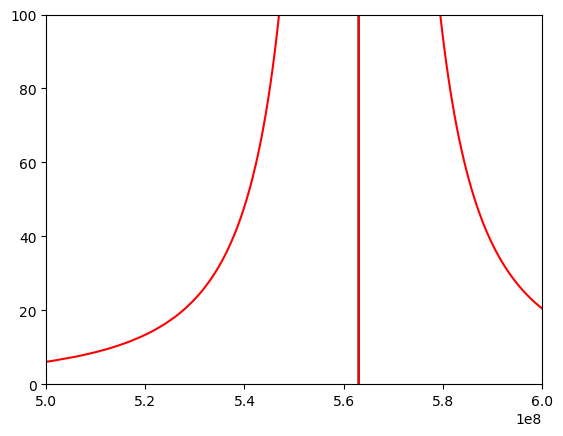

(0, 100)

In [7]:
plot(freqFFT[1:10000],imag.(Wakefftnomalized[1:10000])/cc,"k-")
plot(freqFFT[1:10000],real.(Wakefftnomalized[1:10000])/cc,"r-")

plot(wf/2pi,map(x->real(Zimp_func(RoQ2cell,5e2,x)),wf),"b-",label="real")
plot(wf/2pi,map(x->imag(Zimp_func(RoQ2cell,5e2,x)),wf),"r-",label="imag")
xlim(0.5e9,0.6e9)
ylim(0,100)


# Wakefield solution

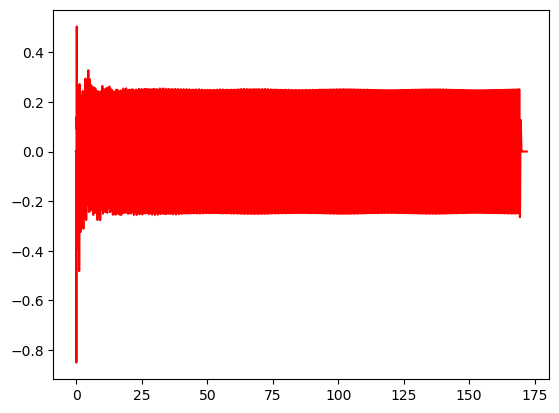

828573.5

In [8]:
#Comparision of wakefield by model and cst simulation
WakeInputdata=readdlm("wake_mono_172m.txt")
wakeSinput_frank = WakeInputdata[:,1]*0.001;
wakefieldInput_frank = WakeInputdata[:,2];


plot(wakeSinput_frank, wakefieldInput_frank,"r-");

length(wakefieldInput_frank)/2

In [80]:
function Szero_index(data)
    sdata=data
    for i=1:length(sdata)
        if sdata[i]>0
            print(i)
            return i
            break
        end
    end
end

Szero_index (generic function with 1 method)

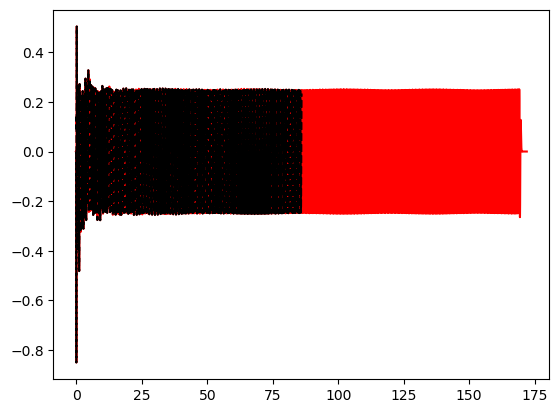

16471647

In [81]:
# Cut out half of the wake
Nwakehalf=Int(floor((length(wakeSinput_frank)-Szero_index(wakeSinput_frank))/2)+Szero_index(wakeSinput_frank));
wakeSinput_frank_hf = wakeSinput_frank[1:Nwakehalf];
wakefieldInput_frank_hf = wakefieldInput_frank[1:Nwakehalf];
length(wakeSinput_frank_hf)
plot(wakeSinput_frank, wakefieldInput_frank,"r-");
plot(wakeSinput_frank_hf, wakefieldInput_frank_hf,"k--");
#xlim(-1,1)

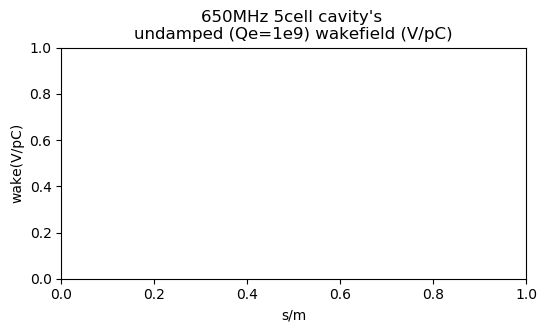

PyObject Text(24.000000000000007, 0.5, 'wake(V/pC)')

In [10]:
###datat
HOMdata=readdlm("HOMdata_RR2Cv1142_kolb22-digits.txt")

freq1 = HOMdata[:,1]*1e9

Crev=3833.845;frf=cc/Crev*315*24

freq=freq1
Qext = HOMdata[:,2]
RoQlongi = HOMdata[:,3]
Zimplong = Qext.*RoQlongi
#ZohmTrans=HOMdata[:,4].*HOMdata[:,2]


## get the fitted wakefield
freq_5cell = freq  #HOMdata_5cell[:,1]*650/647
Qext_5cell = Qext  #ones(length(freq_5cell))*1e9
RoQm_5cell = RoQlongi  #HOMdata_5cell[:,3]
Zimp_5cell = Zimplong# Qext_5cell.*RoQm_5cell

sigmat=0.02/cc
function wakeSinglebunch_5cell(s) # unit V/pC
    sum=0
    for n=1:size(freq_5cell,1)
        sum=sum+(1e-12*2*pi*freq_5cell[n]*RoQm_5cell[n]/4*exp(-2*pi*freq_5cell[n]*s/cc/(2*Qext_5cell[n]))
        *exp(-(2*pi*freq_5cell[n]*sigmat)^2)*cos(2*pi*freq_5cell[n]*s/cc)
        *real((1+1im/2/RoQm_5cell[n])
        *erfc(-1im*(2*pi*freq_5cell[n]*sigmat/sqrt(2)+1im*(2*pi*freq_5cell[n]*sigmat/2/Qext_5cell[n]-s/cc/sigmat)/sqrt(2))))) 
    end
    return sum
end


function wakemode(t)
    sum=0
   for n=1:Int(length(freq_5cell)) 
    Qe= Qext_5cell[n]
    omega0= 2pi*freq_5cell[n]
    RoQ=RoQm_5cell[n]
        
    tau0=2*Qe/omega0
    Q1=sqrt(1-1/Qe^2)
    Q2=1/sqrt(4*Qe^2-1)
    aa=cos(omega0*Q1*t)
    bb=Q2*sin(omega0*Q1*t)
        
    sum=sum+omega0*RoQ*exp(-t/tau0)*(aa-bb)
        
    end
    return sum 
end


fig=figure(figsize=(6,3))
Slength=1.720
deltaS=wakeSinput_frank[2]-wakeSinput_frank[1]
sx=(0:deltaS:Slength)
st=sx/cc
wake_formula=map(st->wakemode(st),st)
#plot(sx,wake_formula,"r-")
title("650MHz 5cell cavity's 
undamped (Qe=1e9) wakefield (V/pC)")
xlabel("s/m")
ylabel("wake(V/pC)")
#xlim(0,172)


In [11]:
#open("172m0_wencan_created_new.txt", "w") do io
#           writedlm(io, [sx  wake_formula])
#end

In [12]:
#save("/Users/wxu/Desktop/1720m_wake.jld","sx",sx,"wake1720",wake_formula)
#d=load("/Users/wxu/Desktop/1720m_wake.jld","sx","wake1720");
WakeInputdata_wencan=readdlm("1720m_wencan_created.txt");
wakeS_xu_172m=WakeInputdata_wencan[:,1];
wakeField_xu_172m=WakeInputdata_wencan[:,2];


In [13]:
#find the next power of 2
function nextpower2(data)
    n=length(data)
    pow2=ceil(Int, log(2,n-1))
    deltaNpoint=2^pow2-n
    return pow2
end


nextpower2 (generic function with 1 method)

In [14]:
#save("/Users/wxu/Desktop/1720m_wake.jld","sx",sx,"wake1720",wake_formula)
#d=load("/Users/wxu/Desktop/1720m_wake.jld","sx","wake1720");
WakeInputdata_wencan=readdlm("1720m_wencan_created.txt")
wakeS_xu_1720m=WakeInputdata_wencan[:,1];
wakeField_xu_1720m=WakeInputdata_wencan[:,2];

nextpower2(wakeField_xu_1720m)

24

In [15]:
WakeInputdata_Quater1=readdlm("563MHzQuater_openBC_potential_Z.txt")

wakeS_Quarter1=WakeInputdata_Quater1[:,1]*0.001;
wakeField_Quarter1=WakeInputdata_Quater1[:,2];

nextpower2(wakeField_Quarter1)

WakeInputdata_Quater2=readdlm("563MHzQuater_open_337KcellsZ.txt")

wakeS_Quarter2=WakeInputdata_Quater2[:,1]*0.001;
wakeField_Quarter2=WakeInputdata_Quater2[:,2];

nextpower2(wakeField_Quarter2)




iSzero=Szero_index(wakeS_Quarter1)


455

455

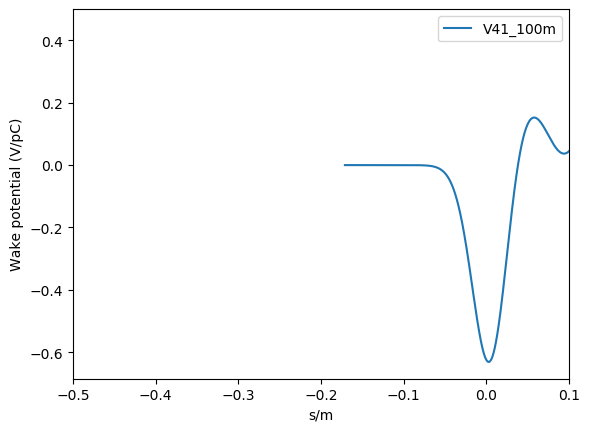

10591059

1059

In [121]:
WakeInputdata_V41=readdlm("V41_100m_HH_Wake potential_Z.txt")

wakeSinput_V41=WakeInputdata_V41[:,1]*0.001;
wakeFieldinput_V41=WakeInputdata_V41[:,2];

iSzero=Szero_index(wakeSinput_V41)

plot(wakeSinput_V41,wakeFieldinput_V41,label="V41_100m")

legend()
xlabel("s/m")
ylabel("Wake potential (V/pC)")
xlim(-0.5,0.1)

wakeSinput_V41[iSzero-1:iSzero+1]

nextpower2(wakeSinput_V41)
V41_Nzero=Szero_index(wakeSinput_V41)

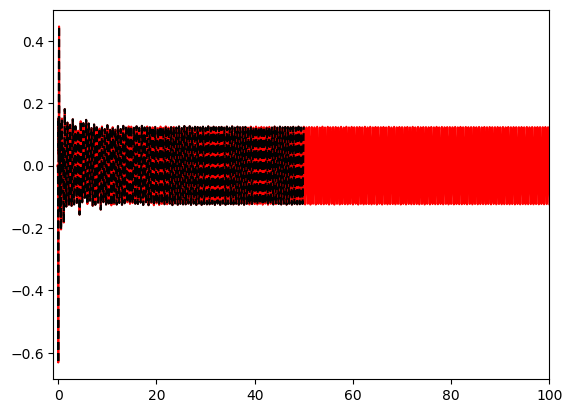

10591059

(-1, 100)

In [122]:
# Cut out half of the wake
Nwakehalf=Int(floor((length(wakeSinput_V41)-Szero_index(wakeSinput_V41))/2)+Szero_index(wakeSinput_V41));
wakeSinput_V41_hf = wakeSinput_V41[1:Nwakehalf];
wakeFieldinput_V41_hf = wakeFieldinput_V41[1:Nwakehalf];
length(wakeSinput_V41_hf)
plot(wakeSinput_V41, wakeFieldinput_V41,"r-");
plot(wakeSinput_V41_hf, wakeFieldinput_V41_hf,"k--");
xlim(-1,100)



In [17]:
WakeInputdata_kolb=readdlm("563MHzBPwithSiC_Wake potential_Z.txt")

wakeS_kolb=WakeInputdata_kolb[:,1]*0.001;
wakeField_kolb=WakeInputdata_kolb[:,2];

nextpower2(wakeField_kolb)
wakeS_kolb[436:441]

6-element Array{Float64,1}:
 -0.0007752004999999999
 -0.00038392871
  7.3430691e-6
  0.00039861485
  0.00078988664
  0.0011811584

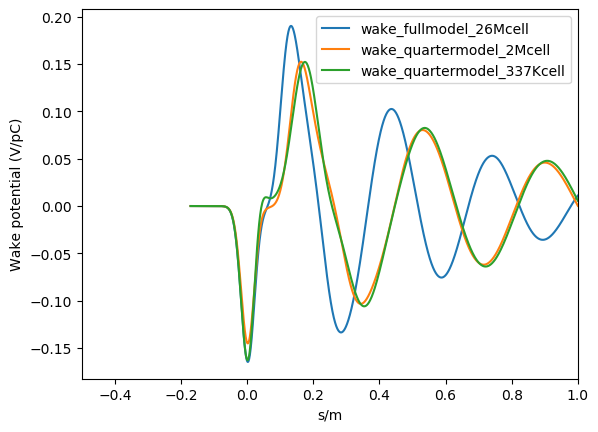

(-0.5, 1)

In [18]:
plot(wakeS_kolb,wakeField_kolb,label="wake_fullmodel_26Mcell")
plot(wakeS_Quarter1,wakeField_Quarter1,label="wake_quartermodel_2Mcell")
plot(wakeS_Quarter2,wakeField_Quarter2,label="wake_quartermodel_337Kcell")
#plot(wakeSinput_frank,wakefieldInput_frank)
legend()
xlabel("s/m")
ylabel("Wake potential (V/pC)")
xlim(-0.5,1)

In [19]:
function fft_wencan(wakeS_in,wake_field_in,Nsample_tot,shiftIndex)
    
    wakefieldInput_original=wake_field_in;
    wakeSinput_original=wakeS_in
    Nsample_fft=Nsample_tot
    
#Resample the wakefield and FFT of the wakefield
   Nsample_input=length(wakefieldInput_original)
  # Nsampling=2^24
   dt_wake=wakeSinput_original[20]-wakeSinput_original[19]
   ST_input=(Nsample_input-1)*dt_wake
   ST=(Nsample_fft-1)*dt_wake
  

   x_wake = (0.0:dt_wake:ST_input)

####window
#define cos window
Coswindow=zeros(Nsample_input)
Coswindow=map(x->cos(x/ST_input*pi/2)*cos(x/ST_input*pi/2),x_wake)
ysample_windowed=Coswindow.*wakefieldInput_original

###padding
Npadding=Nsample_fft-length(wakefieldInput_original);wakefieldpadding=zeros(Npadding)

ysample_cos_padded=vcat(ysample_windowed,wakefieldpadding)

##### moved bunch
if shiftIndex>0
        
  zeroIndex=shiftIndex #1648 shift the start point to s=0

  wakefieldInput_head=ysample_cos_padded[1:zeroIndex]
  wakefieldInput_rest=ysample_cos_padded[zeroIndex+1:end]
  ysample_to_fft=vcat(wakefieldInput_rest,wakefieldInput_head);
else
  ysample_to_fft=ysample_cos_padded;
end
#########
Wakefft = 1*rfft(ysample_to_fft)  #/winTriWindow_correct  There is a factor of 2 bigger than python 
    # I believe that this a factor of 2 is power spectrum, if it is wake potential, the resistance will be accel. def.
Wakefftnomalized=dt_wake/cc*Wakefft  # normalize to 1/fs Hz

freqFFT=rfftfreq(Nsample_fft, cc/dt_wake)
df_FFT = freqFFT[2]-freqFFT[1]

println("df_FFT =",(freqFFT[20]-freqFFT[19]))
return freqFFT,Wakefft,df_FFT,Wakefftnomalized
end

fft_wencan (generic function with 1 method)

In [20]:
Nsample=2^25
freqFFT_original,Wakefft_original,df_FFT_original,Wakefftnomalized_original=fft_wencan(wakeSinput_frank,-1e12*wakefieldInput_frank,Nsample,1648);
freqFFT_created,Wakefft_created,df_FFT_created,Wakefftnomalized_created=fft_wencan(wakeS_xu_172m,wakeField_xu_172m,Nsample,0);
freqFFT_1720m,Wakefft_1720m,df_FFT_1720m,Wakefftnomalized_1720m=fft_wencan(wakeS_xu_1720m,wakeField_xu_1720m,Nsample,0);

df_FFT =85974.8987944317
df_FFT =85966.62640926987
df_FFT =85966.62640926987


# Frank's paper####

In [82]:
Nsample=2^25
freqFFT_original,Wakefft_original,df_FFT_original,Wakefftnomalized_original=fft_wencan(wakeSinput_frank,-1e12*wakefieldInput_frank,Nsample,1648);
freqFFT_hf,Wakefft_hf,df_FFT_hf,Wakefftnomalized_hf=fft_wencan(wakeSinput_frank_hf,-1e12*wakefieldInput_frank_hf,Nsample,1648);

df_FFT =85974.8987944317
df_FFT =85974.8987944317


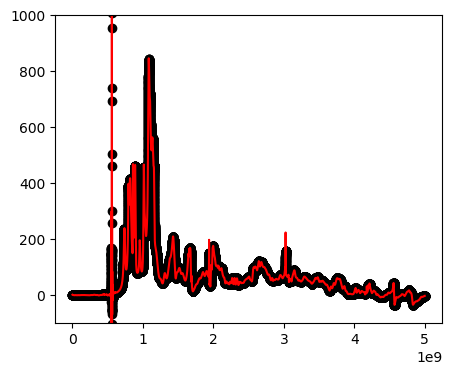

(-100, 1000.0)

In [101]:
fig=figure(figsize=(5,4))
nx=Int(floor(5e9/df_FFT_original))

plot(freqFFT_hf[1:nx],1*real.(Wakefftnomalized_hf[1:nx]),"ko",label="real_hf")
plot(freqFFT_original[1:nx],1*real.(Wakefftnomalized_original[1:nx]),"r-",label="real_original")
#xlim(0e9,10e9)
ylim(-100,1*1e3)


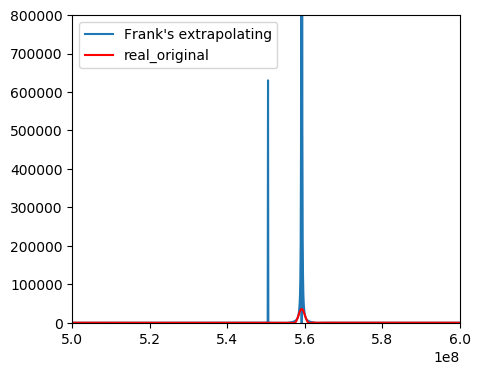

(5.0e8, 6.0e8)

In [84]:
# use Frank's paper
fig=figure(figsize=(5,4))
nx=Int(floor(5e9/df_FFT_original))
a1=real.(Wakefftnomalized_hf[1:nx]).*real.(Wakefftnomalized_hf[1:nx]);
b1=2*real.(Wakefftnomalized_hf[1:nx]).-real.(Wakefftnomalized_original[1:nx]);
z1=a1./b1
plot(freqFFT_hf[1:nx],z1[1:nx],label="Frank's extrapolating")
plot(freqFFT_original[1:nx],1*real.(Wakefftnomalized_original[1:nx]),"r-",label="real_original")
legend()
ylim(-1e3,8e5)
xlim(0.5e9,0.6e9)


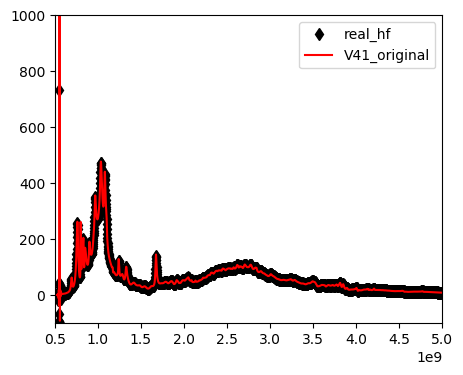

df_FFT =1.7682254155910276e6
df_FFT =1.7682254155910276e6


PyObject <matplotlib.legend.Legend object at 0x231811dd0>

In [123]:
###FFT on the V41 100 meter###
Nsample=2^nextpower2(wakeSinput_V41)
freqFFT_V41,Wakefft_V41,df_FFT_V41,Wakefftnomalized_V41=fft_wencan(wakeSinput_V41,-1e12*wakeFieldinput_V41,Nsample,V41_Nzero);
freqFFT_V41hf,Wakefft_V41hf,df_FFT_V41hf,Wakefftnomalized_V41hf=fft_wencan(wakeSinput_V41_hf,-1e12*wakeFieldinput_V41_hf,Nsample,V41_Nzero);

fig=figure(figsize=(5,4))

nx=Int(floor(10e9/df_FFT_V41))
nx_original=Int(floor(5e9/df_FFT_original))
plot(freqFFT_V41hf[1:nx],1*real.(Wakefftnomalized_V41hf[1:nx]),"kd",label="real_hf")
plot(freqFFT_V41[1:nx],1*real.(Wakefftnomalized_V41[1:nx]),"r-",label="V41_original")
#plot(freqFFT_original[1:nx_original],1*real.(Wakefftnomalized_original[1:nx_original]),"g-",label="2cell")
xlim(0.5e9,5e9)
ylim(-100,1*1e3)
legend()



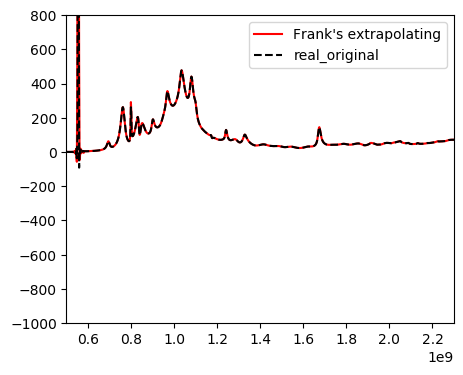

(5.0e8, 2.3e9)

In [140]:
# use Frank's paper
fig=figure(figsize=(5,4))
nx=Int(floor(5e9/df_FFT_V41))
a1=real.(Wakefftnomalized_V41hf[1:nx]).*real.(Wakefftnomalized_V41hf[1:nx]);
b1=2*real.(Wakefftnomalized_V41hf[1:nx]).-real.(Wakefftnomalized_V41[1:nx]);
z1=a1./b1
plot(freqFFT_V41hf[1:nx],z1[1:nx],"r-",label="Frank's extrapolating")
plot(freqFFT_V41[1:nx],1*real.(Wakefftnomalized_V41[1:nx]),"k--",label="real_original")
legend()
ylim(-1e3,8e2)
xlim(0.5e9,2.3e9)
#yscale("log")



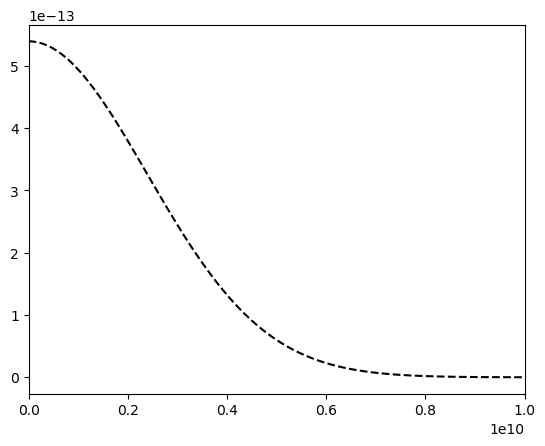

df_FFT =1.7682254155910276e6


2.9896664933994107e9

In [149]:
#resample the gaussion bunch and FFT
sigmat=0.02/cc
#define a gaussion and plot the bunch shape
function Gaussion(s,n,offZero,sigmat)
    return 1/sqrt(2*pi)/(sigmat*cc)*exp(-0.5*((s-offZero*cc*sigmat)/(cc*sigmat))^2) 
end

####Modification####
ds_gaussian=(wakeSinput_V41[2]-wakeSinput_V41[1]) # in meter
Nshift=V41_Nzero*2;s_start=-Nshift/2*ds_gaussian;s_end=Nshift/2*ds_gaussian

resample_gaussian=zeros(length(wakeSinput_V41))

####
for i=1:Nshift
    s=(Nshift/2-i)*ds_gaussian
    resample_gaussian[i]=Gaussion(s,0,0,0.02/cc)
end

function GaussionSpect0(f)
    return exp(-0.5*(2*pi*f*sigmat)^2) # unit of 1
end

GaussanFFT_formula=map(xf->GaussionSpect0(xf),freqFFT_original);

freqFFT_bunch,Wakefft_bunch,df_FFT_bunch,bunch_normalized=fft_wencan(wakeSinput_V41,resample_gaussian,Nsample,V41_Nzero);
nx=Int(floor(5e9/df_FFT_bunch))

nx=Int(floor(15e9/df_FFT_created))

plot(freqFFT_bunch[1:2*nx],real.(bunch_normalized[1:2*nx]*ds_gaussian),"k--")
xlim(0,10e9)

gausian=zeros(nx)
for j=(2:nx)   
     gausian[j]=(gausian[j-1])+(GaussanFFT_formula[j])*df_FFT_created
end
gausian[end]


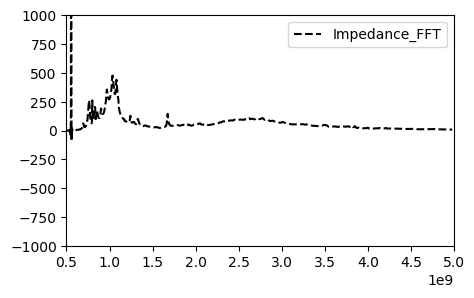

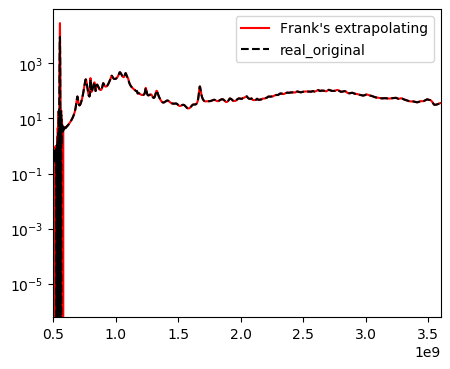

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[165]:23
└ @ Core In[165]:23


In [165]:
### get the impedance
function Impedance(wake_in,dfFFT,bunch_in,freq_high)

  nx=Int(floor(freq_high/dfFFT))

  Impedance=(wake_in[1:nx])./bunch_in[1:nx]

  Imped_real=(real.(Impedance[1:nx]))
  return Imped_real
end

Imped_real_V41=1*Impedance(Wakefftnomalized_V41,df_FFT_V41,GaussanFFT_formula,10e9)
Imped_real_V41hf=1*Impedance(Wakefftnomalized_V41hf,df_FFT_V41hf,GaussanFFT_formula,10e9)


nx=Int(floor(5e9/df_FFT_V41))
fig=figure(figsize=(5,3))

p3=plot(freqFFT_V41[1:nx-10], Imped_real_V41[1:nx-10],"k--",label="Impedance_FFT")
f = 5e8:0.01e6:2e9;
#p2=plot(f,map(f->real(FittedImp(f)),f),"k-")
ax=gca()
ax[:set_xlim](0.50e9,5.0e9)
ylim(-1000,1000)
legend()


# use Frank's paper
fig=figure(figsize=(5,4))
a1=real.(Imped_real_V41hf[1:nx]).*real.(Imped_real_V41hf[1:nx]);
b1=2*real.(Imped_real_V41hf[1:nx]).-real.(Imped_real_V41[1:nx]);
Zimp_extrapolating=a1./b1
plot(freqFFT_V41hf[1:nx],Zimp_extrapolating[1:nx],"r-",label="Frank's extrapolating")
plot(freqFFT_V41[1:nx],1*real.(Imped_real_V41[1:nx]),"k--",label="real_original")
legend()
#ylim(-1,8e2)
xlim(0.5e9,3.6e9)
yscale("log")


df_FFT =730708.6345667187
df_FFT =

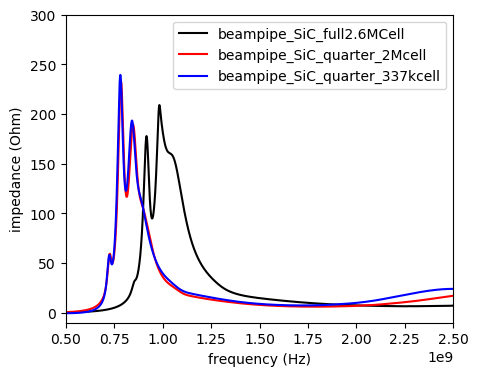

758447.4942882899
df_FFT =180633.1651368118


(-10, 300)

In [114]:
####Beampipe
freqFFT_kolb,Wakefft_kolb,df_FFT_kolb,Wakefftnomalized_kolb=fft_wencan(wakeS_kolb,-1e12*wakeField_kolb,Nsample,437);
freqFFT_Q1,Wakefft_Q1,df_FFT_Q1,Wakefftnomalized_Q1=fft_wencan(wakeS_Quarter1,-1e12*wakeField_Quarter1,Nsample,455);
freqFFT_Q2,Wakefft_Q2,df_FFT_Q2,Wakefftnomalized_Q2=fft_wencan(wakeS_Quarter2,-1e12*wakeField_Quarter2,Nsample,110);


fig=figure(figsize=(5,4))
nx_kolb=Int(floor(10e9/df_FFT_kolb))
nx_Q1=Int(floor(10e9/df_FFT_Q1))
nx_Q2=Int(floor(10e9/df_FFT_Q2))
#plot(freqFFT_original[1:nx],0.5*1e-12*real.(Wakefft_original[1:nx]),"ko",label="real_original")
#plot(freqFFT_original[1:nx],1*real.(Wakefftnomalized_original[1:nx]),"r-",label="real_original")
plot(freqFFT_kolb[1:nx_kolb],1*real.(Wakefftnomalized_kolb[1:nx_kolb]),"k-",label="beampipe_SiC_full2.6MCell")
plot(freqFFT_Q1[1:nx_Q1],1*real.(Wakefftnomalized_Q1[1:nx_Q1]),"r-",label="beampipe_SiC_quarter_2Mcell")
plot(freqFFT_Q2[1:nx_Q2],1*real.(Wakefftnomalized_Q2[1:nx_Q2]),"b-",label="beampipe_SiC_quarter_337kcell")
#plot(freqFFT_created[1:nx],1*real.(Wakefftnomalized_created[1:nx]),"ko",label="real-created")
#plot(freqFFT_1720m[1:nx],1*real.(Wakefftnomalized_1720m[1:nx]),"b-",label="1720m")
legend()
xlabel("frequency (Hz)")
ylabel("impedance (Ohm)")
xlim(0.5e9,2.5e9)
ylim(-10,300)
#yscale("log")

In [26]:
# search the peak

nx=Int(floor(0.7e9/df_FFT_original))
ind_max = findmax(real.(Wakefftnomalized_original[1:nx]))  # find the maximum value [1] and index [2]
Resistance_fund=ind_max[1];freq_fund=freqFFT_original[ind_max[2]]
println("preak resistant=",Resistance_fund,", freq@peak=",freq_fund)
ind_low=findfirst(x -> x>Resistance_fund/2, real.(Wakefftnomalized_original[1:nx])) # returns nothing, but not printed in the REPL
freq_low=freqFFT_original[ind_low]
ind_high=findlast(x -> x>Resistance_fund/2, real.(Wakefftnomalized_original[1:nx])) # returns nothing,
freq_high=freqFFT_original[ind_high]
Qext=freq_fund/(freq_high-freq_low)
RoQ=Resistance_fund/Qext
println(ind_low," ", ind_max[2],"  ",ind_high)
println(freq_low/1e6," ", freq_fund/1e6,"  ",freq_high/1e6)
println(RoQ)

preak resistant=35692.29032007238, freq@peak=5.59180741758985e8
6495 6505  6515
558.3209927710407 559.180741758985  560.0404907469294
109.75489028313122


In [27]:
#open("waketocheckwithpython.txt", "w") do io
#           writedlm(io, [real.(freqFFT_original)  real.(Wakefft_original)])
#end

In [28]:
# Integraged Fundamental mode__wencan
function RoQ_calculation(Wakefft_in,dfFFT,freq_high)
   nend=Int(floor(freq_high/dfFFT))
  zimp_Int=zeros(nend)
  for j=(2:nend)
    if real(Wakefft_in[j])>0
     zimp_Int[j]=zimp_Int[j-1]+abs(real.(Wakefft_in[j]))*dfFFT
    else
     zimp_Int[j]=zimp_Int[j-1]+abs(-real.(Wakefft_in[j]))*dfFFT     
    end
  end
  return zimp_Int
end

Zimp_Int_original=RoQ_calculation(Wakefftnomalized_original,df_FFT_original,0.7e9);
Zimp_Int_created=RoQ_calculation(Wakefftnomalized_created,df_FFT_created,0.7e9);
Zimp_Int_1720m=RoQ_calculation(Wakefftnomalized_1720m,df_FFT_1720m,0.7e9);

Zimp_Int_chao=pi*146/2*2*pi*560e6/2;

println("Zimp_Int_created=",Zimp_Int_created[end],", Zimp_Int_original=",Zimp_Int_original[end],", Zimp_Int_1720m=",Zimp_Int_1720m[end])
println("RoQ_wencan=",Zimp_Int_created[end]/pi/pi*2/559e6,", RoQ_original=",Zimp_Int_original[end]/pi/pi*2/559e6)
Zimp_Int_chao=pi*146/2*2*pi*560e6/2

Zimp_Int_created=1.3972890192347565e11, Zimp_Int_original=6.729943047288904e10, Zimp_Int_1720m=1.3972890192347565e11
RoQ_wencan=50.65294358472516, RoQ_original=24.39662953119261


4.0346942791653296e11

In [145]:
#resample the gaussion bunch and FFT
sigmat=0.02/cc
#define a gaussion and plot the bunch shape
function Gaussion(s,n,offZero,sigmat)
    return 1/sqrt(2*pi)/(sigmat*cc)*exp(-0.5*((s-offZero*cc*sigmat)/(cc*sigmat))^2) 
end

####Modification####
ds_gaussian=(wakeSinput_V41[2]-wakeSinput_V41[1]) # in meter
Nshift=V41_Nzero*2;s_start=-Nshift/2*ds_gaussian;s_end=Nshift/2*ds_gaussian

resample_gaussian=zeros(length(wakeSinput_V41))

####
for i=1:Nshift
    s=(Nshift/2-i)*ds_gaussian
    resample_gaussian[i]=Gaussion(s,0,0,0.02/cc)
end
    


function GaussionSpect0(f)
    return exp(-0.5*(2*pi*f*sigmat)^2) # unit of 1
end

GaussanFFT_formula=map(xf->GaussionSpect0(xf),freqFFT_original);


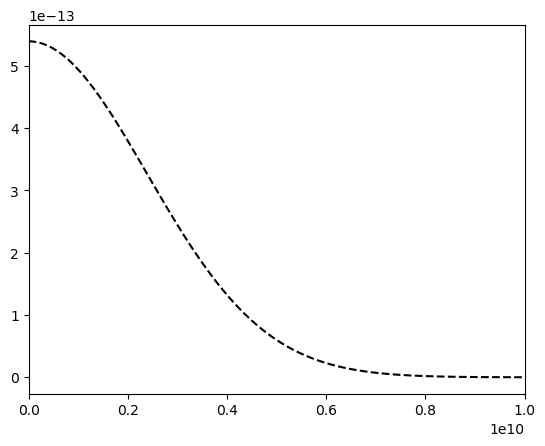

df_FFT =1.7682254155910276e6


2.9896664933994107e9

In [147]:
freqFFT_bunch,Wakefft_bunch,df_FFT_bunch,bunch_normalized=fft_wencan(wakeSinput_V41,resample_gaussian,Nsample,V41_Nzero);
nx=Int(floor(5e9/df_FFT_bunch))

#plot(freqFFT_bunch[1:2*nx],real.(Wakefft_bunch[1:2*nx]*ds_gaussian))
nx=Int(floor(15e9/df_FFT_created))

#plot(freqFFT_original[1:nx],GaussanFFT_formula[1:nx],"ro")
#plot(freqFFT_bunch[1:2*nx],real.(Wakefft_bunch[1:2*nx]*ds_gaussian),"k--")
plot(freqFFT_bunch[1:2*nx],real.(bunch_normalized[1:2*nx]*ds_gaussian),"k--")
xlim(0,10e9)
#(freqFFT[1:nx],GaussanFFT_formula[1:nx])

gausian=zeros(nx)
for j=(2:nx)   
     gausian[j]=(gausian[j-1])+(GaussanFFT_formula[j])*df_FFT_created
end
gausian[end]

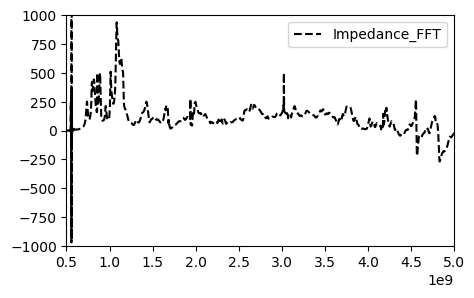

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[32]:20
└ @ Core In[32]:20


11

In [32]:
function Impedance(wake_in,dfFFT,bunch_in,freq_high)

  nx=Int(floor(freq_high/dfFFT))

  Impedance=(wake_in[1:nx])./bunch_in[1:nx]

  Imped_real=(real.(Impedance[1:nx]))
  return Imped_real
end

Imped_real_created=0.5*Impedance(Wakefftnomalized_created,df_FFT_created,GaussanFFT_formula,10e9)
Imped_real_original=1*Impedance(Wakefftnomalized_original,df_FFT_original,GaussanFFT_formula,10e9)
nx=Int(floor(5e9/df_FFT_created))
fig=figure(figsize=(5,3))
#p1=plot(freqFFT_created[1:nx], Imped_real_created[1:nx],"r-",label="Impedance_created")
p3=plot(freqFFT_original[1:nx-10], Imped_real_original[1:nx-10],"k--",label="Impedance_FFT")
f = 5e8:0.01e6:2e9;
#p2=plot(f,map(f->real(FittedImp(f)),f),"k-")
ax=gca()
ax[:set_xlim](0.50e9,5.0e9)
ylim(-1000,1000)
legend()
#ax[:set_yscale]("log")
#yscale("log")

#ylim(1,500000)
length(Imped_real_created)-length(Imped_real_original)

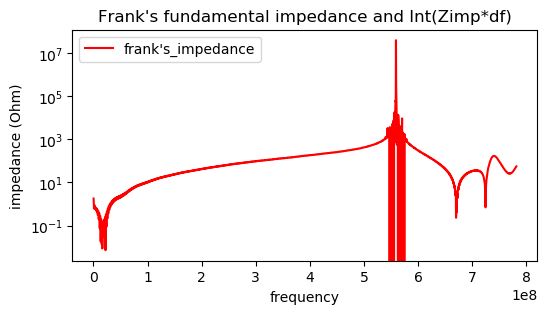

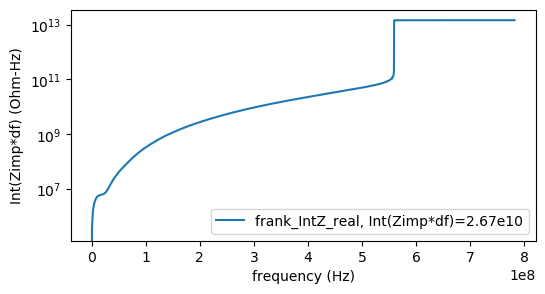

[8.054978935905068e11, 1.4320880061597076e13]


In [33]:
## Import Frank's impedance
# Tool box
#Tools
## import an excel file 
using XLSX
X1=XLSX.readdata("Real_Impedance_Frank.xlsx", "wake", "B:D") ;
freq_frank=(X1[:,1])[3:end];Bunch_frank=(X1[:,2])[3:end];Imped_frank=(X1[:,3])[3:end];
# Integraged Fundamental mode___frank
nend=2273
fig=figure(figsize=(6,3))
p1=plot(freq_frank[1:nend]*1e9, Imped_frank[1:nend],"r-",label="frank's_impedance")
title("Frank's fundamental impedance and Int(Zimp*df)")
legend()
xlabel("frequency")
ylabel("impedance (Ohm)")
#xlim(0.5e9,0.8e9)
yscale("log")
#xlim(0.5e9,0.6e9)

zimp_Int_frank=zeros(nend)
for j=(2:nend)
   
     zimp_Int_frank[j]=(zimp_Int_frank[j-1])+(Imped_frank[j])*abs(freq_frank[j]-freq_frank[j-1])*1e9
   
end
fig=figure(figsize=(6,3))
p_flank=plot(freq_frank[1:nend]*1e9,zimp_Int_frank[1:end],label="frank_IntZ_real, Int(Zimp*df)=2.67e10")
#p_wencan=plot(xf_bunch1[1:nend_wencan],zimp_Int_wencan[1:nend_wencan],label="wencan_IntZ_real")
#xlim(0.5e9,0.8e9)
xlabel("frequency (Hz)")
ylabel("Int(Zimp*df) (Ohm-Hz)")
yscale("log")
#ylim(1e11,10e11)
legend()
#println(freq_frank[nend]*1e9)
println([pi*146*2*pi*559e6/2 ,zimp_Int_frank[end]])

In [34]:
## import mike's impedance

data_input=readdlm("HOMpower_Marhauser_longitudinalimpedance.txt")

freq_bp = data_input[:,1];
impRe_bp = data_input[:,2];
#plot(freq_bp,impRe_bp)
(freq_bp[2]-freq_bp[1])*1e9/df_FFT

5.18962167221882

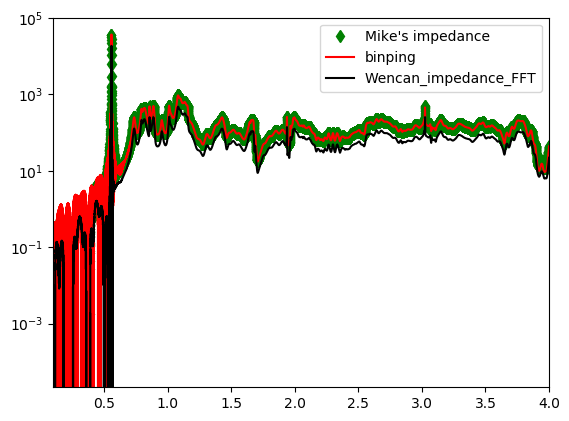

1.9999814179616822

In [35]:
## import mike's impedance

data_input=readdlm("Mike_impedance.txt")

freq_mike = data_input[:,2]
impRe_mike = data_input[:,3]
impRe_in2 = data_input[:,4]
imRoQ_mike = data_input[:,5]
impIm_in2 = data_input[:,6];

plot(freq_mike /1e9,impRe_mike ,"gd",label="Mike's impedance")
plot(freq_bp,impRe_bp,"r-",label="binping")
p1=plot(freqFFT_original[1:nx-10]/1e9, 0.5*Imped_real_original[1:nx-10],"k-",label="Wencan_impedance_FFT")
legend()
yscale("log")
xlim(0.1,4)
(freq_mike[2]-freq_mike[1])/df_FFT_original
#[imRoQ_mike[end]  imRoQ_mike[end]/pi/pi*2/560e6]

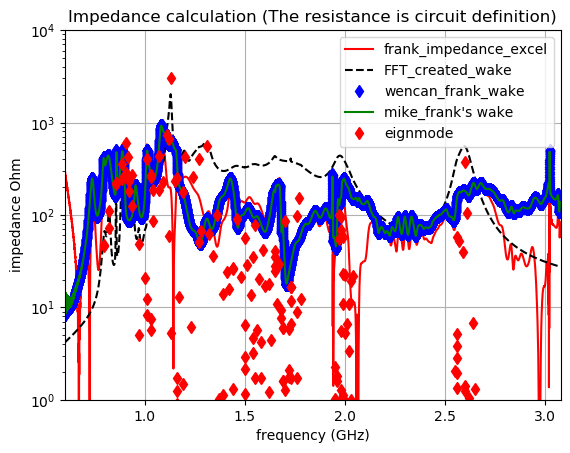

PyObject Text(24.000000000000007, 0.5, 'impedance Ohm')

In [36]:
istart=1;iend=18000
plot_frank=plot(freq_frank[istart:iend],Imped_frank[istart:iend],"r-",label="frank_impedance_excel")
#plot(xfsection_RR/1e9,Imped_section,"k-",label="wencan_impedance_FFT")
p1=plot(freqFFT_created[1:nx]/1e9, Imped_real_created[1:nx],"k--",label="FFT_created_wake")
p1=plot(freqFFT_original[1:nx-10]/1e9, Imped_real_original[1:nx-10],"bd",label="wencan_frank_wake")

plot(freq_mike /1e9,impRe_mike,"g-",label="mike_frank's wake")
plot(freq1/1e9, Zimplong,"rd",label="eignmode")
#f =6e8:0.001e6:2.5e9;
#p_fitting=plot(f/1e9,Fit_imp,"b-",label="fitting from eigenmode ")
xlim(0.6,3.08)

legend()
yscale("log")
ylim(1,1e4)
grid()
title("Impedance calculation (The resistance is circuit definition)")
xlabel("frequency (GHz)")
ylabel("impedance Ohm")

# ERHIC parameters


In [37]:
## eSR parameters
qe=1.602e-19 #C
#case=[Energy beam(GeV) current(A) bunch intensity number of bunches rms_bunch_length (m) harmonic bumber]
# Cooling
case18GeV=[18 0.26 7.2e10 290 0.017 315];  #1
case10GeV=[10 2.5 17.2e10 1160 0.019 315*4];  #2
case5GeV=[5 2.5 17.2e10 1160 0.023 315*4]; #3
case10GeVnoCool=[10 2.5 34.407e10 2*290 0.02 2*315] #4
#case10GeVnoCool=[10 2.5 30e10 2*330 0.019 2*360]  #old pCDR
caseRCS=[18 0.00086 2*17.2e10/5 1 0.015 1]; #5
caseProton275GeVHD=[275 0.74 20.444e10 290 0.06 315]    #6
caseERLHadroncooling=[0.150 0.0985273262429754 6.242197253433209e9 290*4 0.002 315*4];   #7
caseInitial10GeV=[10 0.8 22.02e10 290 0.0083 315]   #8
paraset=[case18GeV;case10GeV;case5GeV;case10GeVnoCool;caseRCS;caseProton275GeVHD;caseERLHadroncooling;caseInitial10GeV]
Crev=3833.845;frev=cc/Crev; f8MHz=frev*315/3; f25MHz=frev*315; T25MHz=1/f25MHz; f49MHz=f25MHz*2; Hz=1;
harm1=315; dT=Crev/cc/360*1e6 # in usec\
caseNum=4
sigmaRing=paraset[caseNum,5]
ceil(paraset[caseNum,4]/harm1)
fb=frev*paraset[caseNum,6]
Ib=paraset[caseNum,3]*qe*fb*paraset[caseNum,4]/paraset[caseNum,6]
frev*2*360

5.630132928170023e7

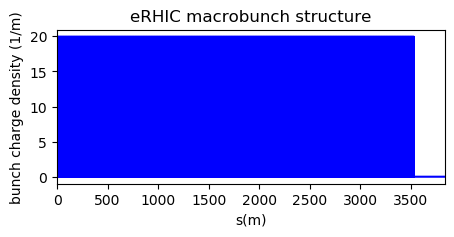

##1 Qb=5.5120014e-8,Ib=2.4999047691264407, fb=4.92636631214877e7 ,sigmaRing=0.02


In [38]:
##Ring-ring 28 MHz
caseNum=4
gapfactor=paraset[caseNum,4]/paraset[caseNum,6]
Qb=paraset[caseNum,3]*qe
sigmaRing=paraset[caseNum,5] # 8mm
fb=frev*paraset[caseNum,6]
Tb=1/fb;
offZero=0
function GaussionTrainRing(s,offZero,nb)
     sum=0
     for j=0:paraset[caseNum,4]
         sum=sum + (1/sqrt(2*pi)/(sigmaRing)*exp(-0.5*((s-offZero*sigmaRing-j*Tb*cc)/(sigmaRing))^2))
     end
    return sum
end    
        
fig=figure(figsize=(5,2))
ST_train= Tb*cc*paraset[caseNum,6]
deltaS_train=Tb*cc/20
sx_train=0:deltaS_train:ST_train

#plt.plot(sx, wake(sx))
#plt.title(" Wake potential(V/pC)andGaussion bunch (1/m)")
#plt.xlabel("s(m)")
#plt.ylabel("wake potential (V/pC)")
#plt.ylim(-1.5,1.5)
#ax2=ax1.twinx()
plot(sx_train, map(sx->GaussionTrainRing(sx,0,0),sx_train),"b-")
#ax=gca()
xlim(0,ST_train*1)
title("eRHIC macrobunch structure")
xlabel("s(m)")
ylabel("bunch charge density (1/m)")


GaussionTrainRing(ST/10,0,0)

println("##1 Qb=",Qb,",Ib=",Ib,", fb=",fb," ,sigmaRing=",sigmaRing)

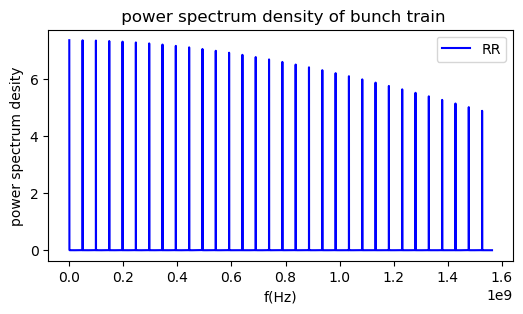

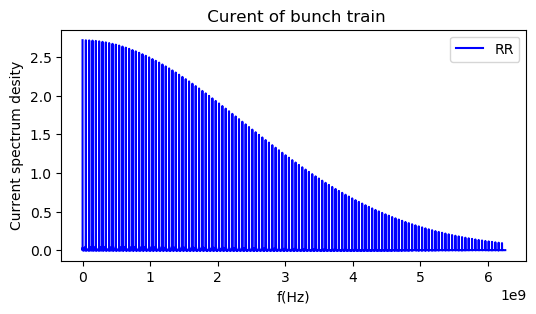

PyObject <matplotlib.legend.Legend object at 0x188a460d0>

In [39]:
#This is FFT of the bunch train 
#No of sampling 
ST1=paraset[caseNum,4]*Tb*cc
ST2=(paraset[caseNum,6]-paraset[caseNum,4])*Tb*cc
ST=ST1+ST2
Nsampling=2^21
#Sample spacing
dt=ST/Nsampling
x = (0.0:dt:(Nsampling-1)*dt)
y = map(x->GaussionTrainRing(x,0,5),x)
#y=eRHICbunchpattern(x)

BunchRR_fft = fft(y)
BunchRR_fftnomalized=Qb*fb*1/abs(BunchRR_fft[1])*BunchRR_fft # normalized to the current
BunchRR_PowerSpectrum=abs.(map(BunchRR_fftnomalized->BunchRR_fftnomalized.^2,BunchRR_fftnomalized))  #Power Spectrum
df=1/2/(dt/cc)/(Nsampling/2)
FF=1/2/(dt/cc)/(Nsampling/2)*(Nsampling/2-1)
xf = (0.0:df:FF)

function GaussionSpec(f)
      return Qb*fb*290/315*exp(-0.5*(2*pi*f*sigmaRing/cc)^2) # unit of 1
end

#plot power spectrum density
f = 7e8:0.01e6:5e9;

fig=figure(figsize=(6,3))

#plot(f,map(f->real(FittedImp(f)),f),"b-",xf,abs(GaussionTrainPowerSpectrum[1:Nsampling/2]),"k-")
plot(xf[1:20000],abs.(BunchRR_PowerSpectrum[1:20000]),"b-",label="RR")

#ax=gca()
#xlim(0.e9,100e3)
title(" power spectrum density of bunch train")
xlabel("f(Hz)")
ylabel("power spectrum desity")
legend(loc="upper right",fancybox="true")
fig=figure(figsize=(6,3))
plot(xf[1:Int(80000)],abs.(BunchRR_fftnomalized[1:Int(80000)]),"b-",label="RR")
title(" Curent of bunch train")
xlabel("f(Hz)")
ylabel("Current spectrum desity")
legend(loc="upper right",fancybox="true")

In [40]:
fb

4.92636631214877e7

# Power calculation Function data

In [41]:

## PSD spectrum

function HOM_power(freq_HOM,Imp_HOM,Nshift) 

##import PSD data
indexfstart=1 # Int(floor(0.00e6/frev)); 
indexfstop=Int(floor(5e9/frev)+1)
xfsection_RR=xf[indexfstart:indexfstop]
PSDsection_RR=BunchRR_PowerSpectrum[indexfstart:indexfstop]
lendata_PSD=Int(length(xfsection_RR)-1000)

plot(xfsection_RR,PSDsection_RR,"kd",label="PSD")## not seeking maximum

freqFFT=freq_HOM
Imped_real=Imp_HOM 

#Get Impedance spectrum
indexfstart=1# Int(floor(0.0e6/df_bunch1))
indexfstop=Int(floor(5000e6/(freqFFT[2]-freqFFT[1]))+1000)

xfsection_bunch=freqFFT[indexfstart:indexfstop]

Imped_section=Imped_real[indexfstart:indexfstop]
lendata_imp=length(Imped_section)
Powerdata_RR=zeros(lendata_PSD+20000)

#resample impedance
Imped_section_new22=zeros(lendata_PSD+200000000);
df_train=xfsection_RR[2]-xfsection_RR[1]; df_imp=freqFFT[2]-freqFFT[1]
dN=Int(floor(df_imp/df_train))
    print("dN=",dN)
df_gap=df_imp-df_train
    println("df_gap=",df_gap)
for i=1:lendata_imp-1
    for j=0:Int(dN-1)
    Imped_section_new22[Int((i-1)*dN+j)+1]=Imped_section[i]+(Imped_section[i+1]-Imped_section[i])*j/dN
    end
end
    
ind_imp=Int(floor(560e6/(df_imp/dN)))  #ind_imp = findmax(Imped_section)[2]
ind_imp_new=Int(floor(560e6/frev))  #ind_imp_new=findmax(Imped_section_new22)[2]
    
println("df_gap=",df_gap)
if ind_imp-ind_imp_new<0
  xshift=Int(abs(ind_imp-ind_imp_new))
  Imped_section_new=vcat(zeros(xshift),Imped_section_new22[1:lendata_PSD-xshift])
  #Imped_section_new=circshift(Imped_section_new22,xshift)
else
    xshift=Int(abs(ind_imp-ind_imp_new))
        Imped_section_new=vcat(Imped_section_new22[xshift:end-xshift],zeros(xshift))
end
 println("xshift=",xshift)   
    
plot(xfsection_RR[1:Int(lendata_PSD+1-1)],Imped_section_new[1:lendata_PSD],label="new")
plot(xfsection_bunch,Imped_section,"r-",label="Imped")
yscale("log")
legend()
length(Imped_section_new)

plot(xfsection_RR,PSDsection_RR,"k-",label="PSD")## not seeking maximum

# calculate the new HOM power
for j=1:lendata_PSD
    Powerdata_RR[j]=(Imped_section_new[j])*abs.(PSDsection_RR)[j]/1 # Note
end   

fig=figure(figsize=(6,3))
p1=plot(xfsection_RR[1:10000],real.(Powerdata_RR[1:10000]),"rd")

#yscale("log")
ylim(1e-1,2e4)
#ax2=powerplot.twinx()
#ax2.plot(f,np.real(FittedImp(f)),"b-")
#ax2.set_yscale("log", nonposx='clip',color='b')
#xlim(0.00e6,3000e6)
title("HOM mode power_RR")
xlabel("frequency (MHz)")
ylabel("Power (W)")
Powerdata_RR;
istart=7000
powerInt_RR_wencan=zeros(length(xfsection_RR))
  for j=(istart:length(xfsection_RR))
    powerInt_RR_wencan[j]=powerInt_RR_wencan[j-1]+Powerdata_RR[j]
  end
    return xfsection_RR,powerInt_RR_wencan
end


HOM_power (generic function with 1 method)

In [169]:
freq_HOM_V41,powerInt_V41=HOM_power(freqFFT_V41[1:100000],Zimp_extrapolating[1:100000],1) ;

BoundsError: BoundsError: attempt to access 2827-element Array{Float64,1} at index [1:100000]

dN=2df_gap=93751.90933097192
df_gap=93751.90933097192
xshift=648
dN=1df_gap=7778.6081254038
df_gap=7778.6081254038
xshift=648


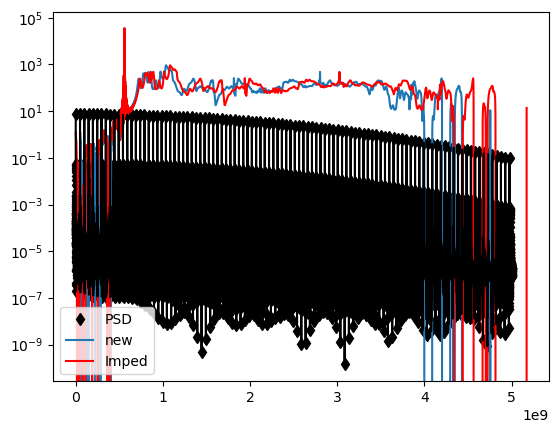

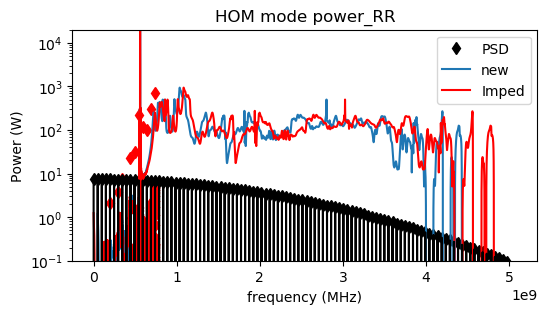

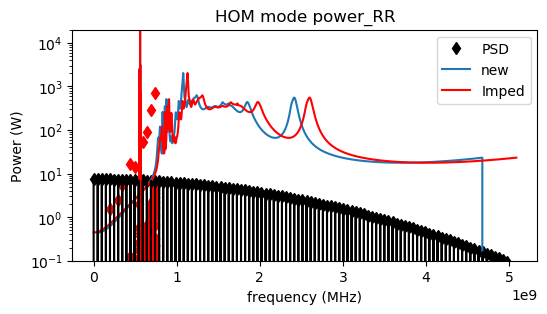

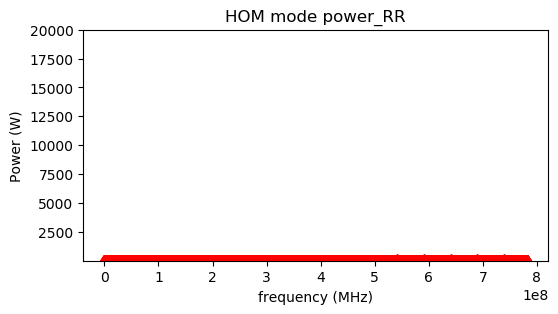

dN=1df_gap=7770.335740241877
df_gap=7770.335740241877
xshift=647


(0.0:78196.2906690281:4.999949021668325e9, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  54092.450544977524, 54092.450544977524, 54092.450544977524, 54092.450544977524, 54092.450544977524, 54092.450544977524, 54092.450544977524, 54092.450544977524, 54092.450544977524, 54092.450544977524])

In [42]:
freq_HOM_mike,powerInt_mike=HOM_power(freq_mike,impRe_mike,1) ;
freq_HOM_FFT_frank,powerInt_FFT_frank=HOM_power(freqFFT_original,Imped_real_original,10000);
freq_HOM_created,powerInt_created=HOM_power(freqFFT_created,Imped_real_created,1000) 

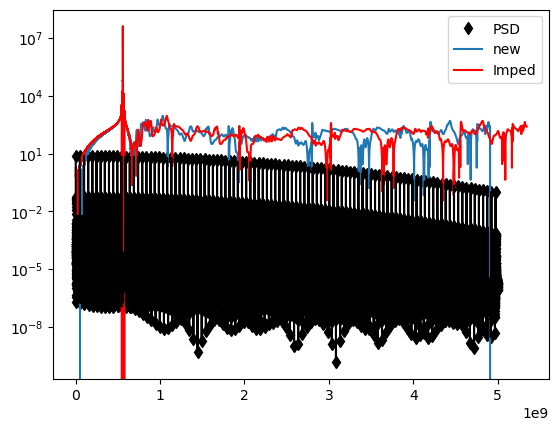

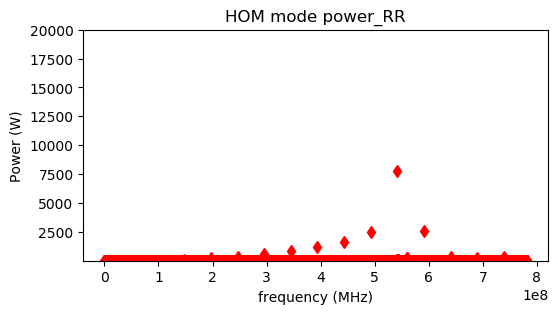

dN=4df_gap=265703.30450860807
df_gap=265703.30450860807
xshift=648


(0.0:78196.2906690281:4.999949021668325e9, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  37202.60990560605, 37202.60990560605, 37202.60990560605, 37202.60990560605, 37202.60990560605, 37202.60990560605, 37202.60990560605, 37202.60990560605, 37202.60990560605, 37202.60990560605])

In [43]:
freq_HOM_excel,powerInt_excel=HOM_power(freq_frank*1e9,Imped_frank,1000) 

In [44]:
istart=1;istop=50000
fig=figure(figsize=(6,3))
p_wencan=plot(freq_HOM_created[1:istop],powerInt_created[1:istop],"k--",label="power_createdwake_wencan")
p_frank=plot(freq_HOM_FFT_frank[1:istop],2*powerInt_FFT_frank[1:istop],"o-",label="power_originalwake_frank")
p_frank=plot(freq_HOM_mike[1:istop],2*powerInt_mike[1:istop],"r--",label="power_mike")
p_frank=plot(freq_HOM_excel[1:istop],2*powerInt_excel[1:istop],"b-",label="power_frank's impedance")
#xlim(1.1e9,1.18e9)
#xlim(600e6,5000e6)
title("Integrated HOM mode power_RR")
legend()
xlabel("frequency (MHz)")
ylabel("Integrated Power (W)")
length(powerInt_RR_wencan)
println("  Power from created wake=", powerInt_created[istop])
println("  Power from FFT_frank's wake=", 2*powerInt_FFT_frank[istop]/1e3)
println("  Power from mike's impedance=", 2*powerInt_mike[istop]/1e3)
println("  Power from excel impedance=", 2*powerInt_excel[istop]/1e3)

UndefVarError: UndefVarError: powerInt_RR_wencan not defined

# Wencan's FFT

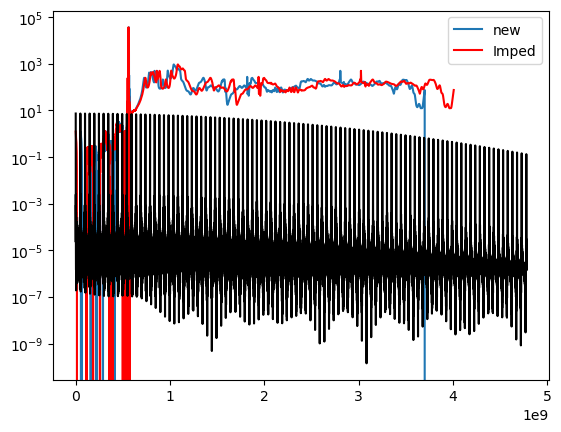

5.863939837270417e8

In [45]:
## PSD spectrum
indexfstart=1 # Int(floor(0.00e6/frev));
indexfstop=Int(floor(4000e6/frev)+10000)
xfsection_RR=xf[indexfstart:indexfstop]

PSDsection_RR=BunchRR_PowerSpectrum[indexfstart:indexfstop]

lendata_PSD=Int(length(xfsection_RR)-10000)


#plot(xfsection_RR,PSDsection_RR,"kd",label="PSD")## not seeking maximum
#Impedance spectrum
indexfstart=1# Int(floor(0.0e6/df_bunch1))
indexfstop=Int(floor(4000e6/df_FFT_bunch)+100)


xfsection_bunch=freqFFT_original[indexfstart:indexfstop]

Imped_section=Imped_real_original[indexfstart:indexfstop]

lendata_imp=length(Imped_section)
Powerdata_RR=zeros(lendata_PSD+10000)
#plot(xfsection_bunch,Imped_section,"ro",label="Imped")
#yscale("log")

#legend()
#xlim(0.7e9,0.72e9)
#resample impedance
Imped_section_new22=zeros(lendata_PSD+20000);
df_train=xfsection_RR[2]-xfsection_RR[1]; df_imp=xfsection_bunch[2]-xfsection_bunch[1]
dN=1# floor(df_imp/df_train)
df_gap=df_imp-df_train
for i=1:lendata_imp-1
    for j=0:Int(dN-1)
    Imped_section_new22[Int((i-1)*dN+j)+1]=Imped_section[i]+(Imped_section[i+1]-Imped_section[i])*j/dN
    end
end

Imped_section_new=circshift(Imped_section_new22,700)


plot(xfsection_RR[1:Int(lendata_PSD+1-1)],Imped_section_new[1:lendata_PSD],label="new")
plot(xfsection_bunch,Imped_section,"r-",label="Imped")
yscale("log")
legend()
length(Imped_section_new)
Imped_section_new[1]-Imped_section[1]

plot(xfsection_RR,PSDsection_RR,"k-",label="PSD")## not seeking maximum
xfsection_RR[7500]


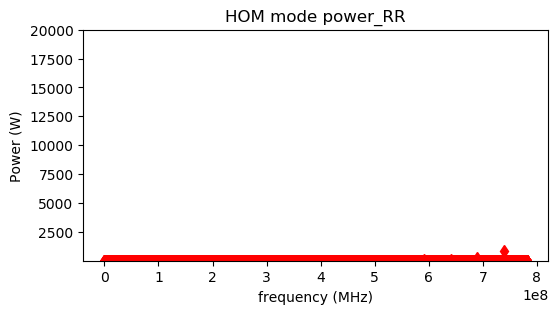

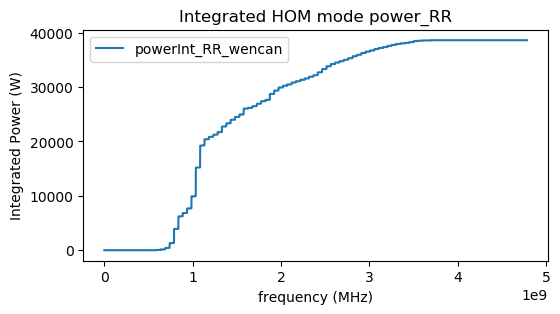

HOM power=38.59149696713689kW


In [46]:
# calculate the new HOM power
for j=1:lendata_PSD
    Powerdata_RR[j]=(Imped_section_new[j])*abs.(PSDsection_RR)[j]/1 # Note
end   

fig=figure(figsize=(6,3))
p1=plot(xfsection_RR[1:10000],real.(Powerdata_RR[1:10000]),"rd")

#yscale("log")
ylim(1e-1,2e4)
#ax2=powerplot.twinx()
#ax2.plot(f,np.real(FittedImp(f)),"b-")
#ax2.set_yscale("log", nonposx='clip',color='b')
#xlim(0.00e6,3000e6)
title("HOM mode power_RR")
xlabel("frequency (MHz)")
ylabel("Power (W)")
Powerdata_RR;
istart=7500
powerInt_RR_wencan=zeros(length(xfsection_RR))
for j=(istart:length(xfsection_RR))
    powerInt_RR_wencan[j]=powerInt_RR_wencan[j-1]+Powerdata_RR[j]
end
fig=figure(figsize=(6,3))
p_wencan=plot(xfsection_RR,powerInt_RR_wencan,label="powerInt_RR_wencan")
#xlim(1.1e9,1.18e9)
#xlim(600e6,5000e6)
title("Integrated HOM mode power_RR")
legend()
xlabel("frequency (MHz)")
ylabel("Integrated Power (W)")
length(powerInt_RR_wencan)
println("HOM power=",powerInt_RR_wencan[length(xfsection_RR)]/1e3,"kW")  # ABCI results 1908 W

# Frank's results

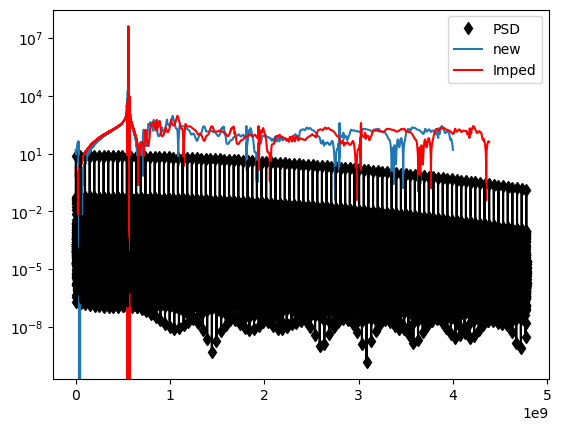

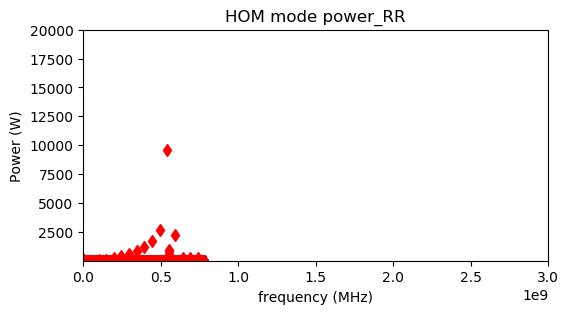

In [47]:
## PSD spectrum
indexfstart=1 # Int(floor(0.00e6/frev));
indexfstop=Int(floor(4000e6/frev)+10000)
xfsection_RR=xf[indexfstart:indexfstop]

PSDsection_RR=BunchRR_PowerSpectrum[indexfstart:indexfstop]

lendata_PSD=Int(length(xfsection_RR)-10000)


plot(xfsection_RR,PSDsection_RR,"kd",label="PSD")## not seeking maximum
#Impedance spectrum
indexfstart=1# Int(floor(0.0e6/df_bunch1))
indexfstop=length(freq_frank)-15000
xfsection_bunch=freq_frank[indexfstart:indexfstop]*1e9

Imped_section=Imped_frank[indexfstart:indexfstop]


lendata_imp=length(Imped_section)
Powerdata_RR=zeros(lendata_PSD+10000)
#plot(xfsection_bunch,Imped_section,"ro",label="Frank_imp")
#yscale("log")

legend()
#xlim(0.7e9,0.72e9)

[lendata_PSD,lendata_imp]
(xfsection_bunch[2]-xfsection_bunch[1])/(xfsection_RR[2]-xfsection_RR[1])

#resample impedance
Imped_section_new22=zeros(lendata_PSD+2000);
df_train=xfsection_RR[2]-xfsection_RR[1]; df_imp=xfsection_bunch[2]-xfsection_bunch[1]
dN=4# floor(df_imp/df_train)
df_gap=df_imp-df_train
for i=1:lendata_imp-1
    for j=0:Int(dN-1)
    Imped_section_new22[Int((i-1)*dN+j)+1]=Imped_section[i]+(Imped_section[i+1]-Imped_section[i])*j/dN
    end
end

Imped_section_new=circshift(Imped_section_new22[1:lendata_PSD], 600)
plot(xfsection_RR[1:Int(lendata_PSD+1-1)],Imped_section_new[1:lendata_PSD],label="new")
plot(xfsection_bunch,Imped_section,"r-",label="Imped")
yscale("log")
legend()
length(Imped_section_new)
Imped_section_new[1]-Imped_section[1]

plot(xfsection_RR,PSDsection_RR,"k-",label="PSD")## not seeking maximum
xfsection_RR[7500]

# calculate the new HOM power
for j=1:lendata_PSD
    Powerdata_RR[j]=(Imped_section_new[j])*abs.(PSDsection_RR)[j]/1 # Note
end   

fig=figure(figsize=(6,3))
p1=plot(xfsection_RR[1:10000],real.(Powerdata_RR[1:10000]),"rd")

#yscale("log")
ylim(1e-1,2e4)
#ax2=powerplot.twinx()
#ax2.plot(f,np.real(FittedImp(f)),"b-")
#ax2.set_yscale("log", nonposx='clip',color='b')
xlim(0.00e6,3000e6)
title("HOM mode power_RR")
xlabel("frequency (MHz)")
ylabel("Power (W)")
Powerdata_RR;
istart=7500
powerInt_RR_frank=zeros(length(xfsection_RR))
for j=(istart:length(xfsection_RR))
    powerInt_RR_frank[j]=powerInt_RR_frank[j-1]+Powerdata_RR[j]
end


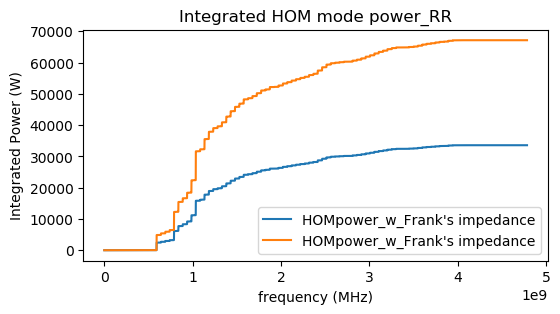

HOM power=33.57302502568903kW


In [48]:
fig=figure(figsize=(6,3))
p_flank=plot(xfsection_RR,powerInt_RR_frank,label="HOMpower_w_Frank's impedance")
p_flank=plot(xfsection_RR,2*powerInt_RR_frank,label="HOMpower_w_Frank's impedance")
legend()
#xlim(1.1e9,1.18e9)
#xlim(600e6,5000e6)
title("Integrated HOM mode power_RR")
xlabel("frequency (MHz)")
ylabel("Integrated Power (W)")
legend()
length(powerInt_RR_frank)
println("HOM power=",powerInt_RR_frank[length(xfsection_RR)]/1e3,"kW")  # ABCI results 1908 W


# Mike's HOM power

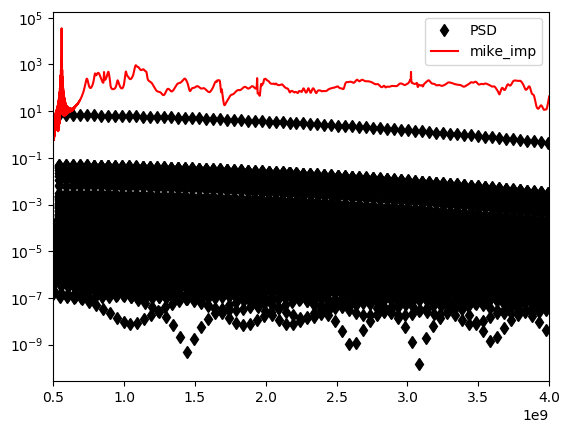

2.1989303908005584

In [49]:
## PSD spectrum
indexfstart=1 # Int(floor(0.00e6/frev));
indexfstop=Int(floor(4000e6/frev)+20000)
xfsection_RR=xf[indexfstart:indexfstop]

PSDsection_RR=BunchRR_PowerSpectrum[indexfstart:indexfstop]

lendata_PSD=Int(length(xfsection_RR)-100)


plot(xfsection_RR,PSDsection_RR,"kd",label="PSD")## not seeking maximum
#Impedance spectrum
indexfstart=1# Int(floor(0.0e6/df_bunch1))
indexfstop=length(freq_mike)-12000

xfsection_bunch=freq_mike[indexfstart:indexfstop]
Imped_section=impRe_mike[indexfstart:indexfstop]


lendata_imp=length(Imped_section)
Powerdata_RR=zeros(lendata_PSD+100000)
plot(xfsection_bunch,Imped_section,"r-",label="mike_imp")
yscale("log")

legend()
xlim(0.5e9,4e9)

[lendata_PSD,lendata_imp]

(xfsection_bunch[2]-xfsection_bunch[1])/(xfsection_RR[2]-xfsection_RR[1])

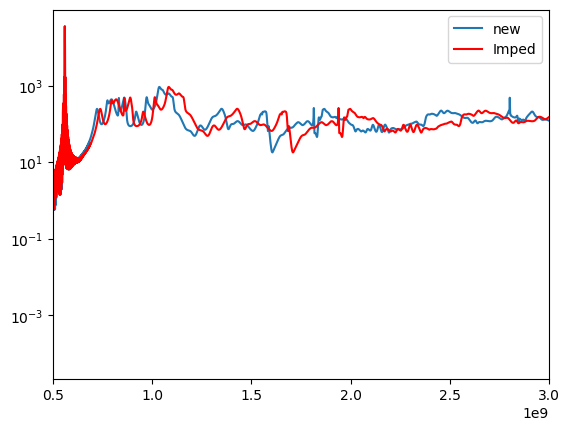

(5.0e8, 3.0e9)

In [50]:
#resample impedance
Imped_section_new22=zeros(lendata_PSD+1000000);
df_train=xfsection_RR[2]-xfsection_RR[1]; df_imp=xfsection_bunch[2]-xfsection_bunch[1]
dN=2# floor(df_imp/df_train)
df_gap=df_imp-df_train
for i=1:lendata_imp-1
    for j=0:Int(dN-1)
    Imped_section_new22[Int((i-1)*dN+j)+1]=Imped_section[i]+(Imped_section[i+1]-Imped_section[i])*j/dN
    end
end

Imped_section_new=vcat(zeros(648),Imped_section_new22[1:lendata_PSD-648])
plot(xfsection_RR[1:Int(lendata_PSD+1-1)],Imped_section_new[1:lendata_PSD],label="new")
plot(xfsection_bunch,Imped_section,"r-",label="Imped")
yscale("log")
legend()
length(Imped_section_new)
Imped_section_new[1]-Imped_section[1]

#plot(xfsection_RR,PSDsection_RR,"k-",label="PSD")## not seeking maximum
xfsection_RR[7500]
xlim(0.5e9,3e9)


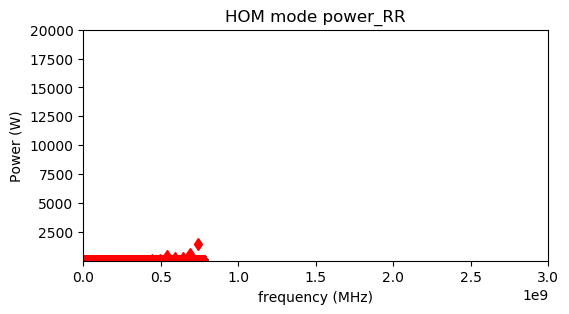

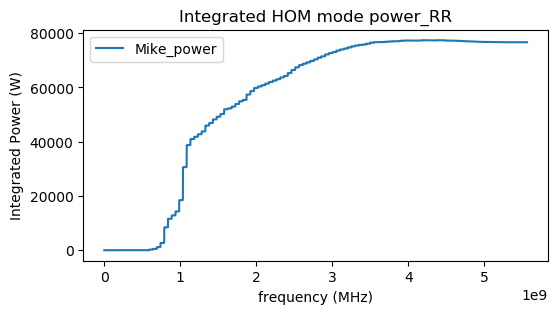

HOM power=76.6640136997557kW


In [51]:
# calculate the new HOM power
for j=1:lendata_PSD
    Powerdata_RR[j]=2*(Imped_section_new[j])*abs.(PSDsection_RR)[j]/1 # Note
end   

fig=figure(figsize=(6,3))
p1=plot(xfsection_RR[1:10000],real.(Powerdata_RR[1:10000]),"rd")

#yscale("log")
ylim(1e-1,2e4)
#ax2=powerplot.twinx()
#ax2.plot(f,np.real(FittedImp(f)),"b-")
#ax2.set_yscale("log", nonposx='clip',color='b')
xlim(0.00e6,3000e6)
title("HOM mode power_RR")
xlabel("frequency (MHz)")
ylabel("Power (W)")

istart=7500
powerInt_RR_mike=zeros(length(xfsection_RR))
for j=(istart:length(xfsection_RR))
    powerInt_RR_mike[j]=powerInt_RR_mike[j-1]+Powerdata_RR[j]
end
fig=figure(figsize=(6,3))
p_flank=plot(xfsection_RR,powerInt_RR_mike,label="Mike_power")
legend()
#xlim(1.1e9,1.18e9)
#xlim(600e6,5000e6)
title("Integrated HOM mode power_RR")
xlabel("frequency (MHz)")
ylabel("Integrated Power (W)")
legend()
length(powerInt_RR_mike)
println("HOM power=",powerInt_RR_mike[length(xfsection_RR)]/1e3,"kW")  # ABCI results 1908 W

In [52]:

fig=figure(figsize=(6,3))
p_wencan=plot(freq_HOM_wencan,powerInt_wencan,label="power_createdwake_wencan")
p_frank=plot(freq_HOM_frank,powerInt_frank,label="power_originalwake_frank")
p_flank=plot(xfsection_RR,powerInt_RR_mike,label="Mike_power")
#p_flank=plot(xfsection_RR,powerInt_RR_mike,label="Mike_power")
#xlim(1.1e9,1.18e9)
#xlim(600e6,5000e6)
title("Integrated HOM mode power_RR")
legend()
xlabel("frequency (MHz)")
ylabel("Integrated Power (W)")
length(powerInt_RR_wencan)


UndefVarError: UndefVarError: freq_HOM_wencan not defined

# FFT with new generated wake####

In [53]:
100+100

200

In [54]:
#dwake344m=load("/Users/wxu/Desktop/344m_wake.jld","sx","wake344");
#dwake1720m=load("/Users/wxu/Julia/1720m_wake.jld","sx","wake1720");
dwake1720m=load("/Users/wxu/Desktop/1720m_wake.jld","sx","wake1720");
plot(dwake1720m[1],dwake1720m[2],label="created wake")
length(dwake1720m[1])
title("created wake with HOM data")
xlabel("s/m")
ylabel("wake potential (V/pC)")


ErrorException: File /Users/wxu/Desktop/1720m_wake.jld cannot be found

In [55]:
wakeSinput = dwake1720m[1];
wakefieldInput = dwake1720m[2];
length(dwake1720m[1])-2^24

UndefVarError: UndefVarError: dwake1720m not defined

In [56]:
open("delim_file.txt", "w") do io
           writedlm(io, [wakeSinput  wakefieldInput])
end

UndefVarError: UndefVarError: wakefieldInput not defined

In [57]:

#Resample the wakefield and FFT of the wakefield
Nsample_input=length(wakeSinput)
Nsampling=2^24
dt_wake=wakeSinput[20]-wakeSinput[19]
ST_input=(Nsample_input-1)*dt_wake
ST=(Nsampling-1)*dt_wake
ResampleWake=zeros(Nsampling);

x_wake = (0.0:dt_wake:(Nsample_input-1)*dt_wake)
###padding
Npadding=Nsampling-length(wakeSinput);wakefieldpadding=zeros(Npadding)

#ysample=map(x->wakeSinglebunch(x),x)
ysample_input=wakefieldInput

#define cos window
Coswindow=zeros(Nsample_input)
Coswindow=map(x->cos(x/ST_input*pi/2),x_wake)
ycoswindow=ysample_input.*Coswindow
ysample=vcat(ycoswindow,wakefieldpadding) #wakefieldInput[1:Nsampling]

#define triangular function 

function Tri(x)
    if x<= (Nsample_input-1)/2*dt_wake
        return 1-x*1/((Nsampling-1)/2*dt_wake)
    else
        return (x-(Nsample_input-1)/2*dt_wake)*1/((Nsample_input-1)/2*dt_wake)
    end
end
TriWindow=map(x->Tri(x),x_wake)
yTriwindow=ysample_input.*TriWindow
#########

Wakefft = fft(ycoswindow)
Wakefftnomalized=dt_wake*Wakefft

function GaussionSpect0(f)
    return exp(-0.5*(2*pi*f*sigmat)^2) # unit of 1
end

df_wake=1/2/(dt_wake/cc)/(Nsample_input/2)
FF_wake=1/2/(dt_wake/cc)/(Nsample_input/2)*(Nsample_input/2-1)
xf_wake = (0.0:df_wake:FF_wake)


GaussionFFT=map(xf->GaussionSpect0(xf),xf_wake)
#Impedance=(Wakefft[1:Nsampling/2])./(Bunchfft[1:Nsampling/2]);

[df_wake  FF_wake]

ArgumentError: ArgumentError: invalid Array dimensions

In [58]:
#resample the gaussion bunch and FFT
sigmat=0.02/cc
#define a gaussion and plot the bunch shape
function Gaussion(s,n,offZero)
    return 1/sqrt(2*pi)/(sigmat*cc)*exp(-0.5*((s-offZero*cc*sigmat-n*Trf*cc)/(cc*sigmat))^2) 
end


x_wake = (0.0:dt_wake:(Nsampling-1)*dt_wake)
ResampleGaussion=map(x->Gaussion(x,0,0),x_wake);
for i=1:500
    ResampleGaussion[end-(i-1)]=Gaussion(-(i-1)*dt_wake,0,0)
end
#fig=figure(figsize=(5,3))
#p0=plot(x,ResampleGaussion,"o")
#p1=plot(bunchSinput,wakeBunchInput)
#ax=gca()
#ax[:set_xlim](ST-0.05,ST+0.0)

###FFT of the Gaussion bunch
x_wake = (0.0:dt_wake:(Nsampling-1)*dt_wake)

ysample = ResampleGaussion[1:Nsampling]

Coswindow=zeros(Nsampling)
Coswindow=map(x->cos(x/ST*pi/2),x_wake)
ycoswindow=ysample.*Coswindow

#define Tri window
function Tri(x)
    if x<= (Nsampling-1)/2*dt_wake
        return 1-x*1/((Nsampling-1)/2*dt_wake)
    else
        return (x-(Nsampling-1)/2*dt_wake)*1/((Nsampling-1)/2*dt_wake)
    end
end
TriWindow=map(x->Tri(x),x_wake)
yTriwindow=ysample.*TriWindow



Bunchfft_imp = fft(ycoswindow)
#Bunchfftnomalized_imp=1/abs(Bunchfft_imp[1])*Bunchfft_imp
Bunchfftnomalized_imp=2*dt_wake*Bunchfft_imp

df_bunch1_new=1/2/(dt_wake/cc)/(Nsample_input/2)
FF_bunch1_new=1/2/(dt_wake/cc)/(Nsample_input/2)*(Nsample_input/2-1)
xf_bunch1_new = (0.0:df_bunch1_new:FF_bunch1_new)

df_bunchT=1/2/(dt_wake/cc)/(Nsampling/2)
FF_bunchT=1/2/(dt_wake/cc)/(Nsampling/2)*(Nsampling/2-1)
xf_bunchT = (0.0:df_bunchT:FF_bunchT)


fig=figure(figsize=(5,3))

plot(xf_bunchT[1:Int(Nsampling/4)], real(Bunchfftnomalized_imp[1:Int(Nsampling/4)]),"k",label="FFT")
ax=gca()
ax[:set_xlim](0,10.0e9)
p2=plot(xf_bunch1_new, map(xf->GaussionSpect0(xf),xf_bunch1_new),"r--",label="theory")
df
legend()
xlabel("frequency")
ylabel("normalized bunch density")

UndefVarError: UndefVarError: Trf not defined

In [59]:
Impedance_newWake=(Wakefft[1:Int(Nsampling/16)])./(Bunchfftnomalized_imp[1:Int(Nsampling/16)])
Imped_newwake_real=abs.(real.(Impedance_newWake[1:Int(Nsampling/16)]))
fig=figure(figsize=(5,3))
p1=plot(xf_bunch1_new[1:Int(Nsampling/16)], Imped_newwake_real,"r-")
f = 5e8:0.01e6:2e9;
ax=gca()
ax[:set_xlim](0.50e9,3.5967e9)

#ax[:set_yscale]("log")
yscale("log")

#ylim(1,500000)
563e6/df

UndefVarError: UndefVarError: Bunchfftnomalized_imp not defined

In [60]:
p1=plot(xf_bunch1[1:Int(Nsampling/16/8)], Imped_real[1:Int(Nsampling/16/8)],"k-",label="original_wake")
p2=plot(xf_bunch1_new[1:Int(Nsampling/16/8)], Imped_newwake_real[1:Int(Nsampling/16/8)],"g-",label="1720m wake")
plot(freq1, Zimplong,"md",label="eignmode")
istart=1;iend=13000
plot_frank=plot(freq_frank[istart:iend]*1e9,Imped_frank[istart:iend],"r-",label="frank_impedance_original")
f =5e8:0.001e6:3.0e9;
p_fitting=plot(f,Fit_imp,"b-",label="fitting from eigenmode ")
yscale("log")
legend()
xlim(0.6e9,3.0e9)
ylim(1,1e5)
grid()
title("Impedance calculation comparison")
xlabel("frequency (Hz)")
ylabel("impedance Ohm")

UndefVarError: UndefVarError: xf_bunch1 not defined

In [61]:
p1=plot(xf_bunch1[1:Int(Nsampling/16/8)], Imped_real[1:Int(Nsampling/16/8)],"k-",label="original_wake")
p2=plot(xf_bunch1_new[1:Int(Nsampling/16/8)], Imped_newwake_real[1:Int(Nsampling/16/8)],"g-",label="1720m wake")
#plot(freq1, Zimplong,"md",label="eignmode")
istart=1;iend=13000
#plot_frank=plot(freq_frank[istart:iend]*1e9,Imped_frank[istart:iend],"r-",label="frank_impedance_original")
f =5e8:0.001e6:3.0e9;
p_fitting=plot(f,Fit_imp,"b-",label="fitting from eigenmode ")
yscale("log")
legend()
xlim(0.54e9,0.57e9)
#ylim(1,1e4)
grid()
title("Impedance calculation comparison")
xlabel("frequency (Hz)")
ylabel("impedance Ohm")

UndefVarError: UndefVarError: xf_bunch1 not defined

In [62]:
## PSD spectrum
indexfstart=1 # Int(floor(0.00e6/frev));
indexfstop=Int(floor(4000e6/frev)+10000)
xfsection_RR=xf[indexfstart:indexfstop]

PSDsection_RR=BunchRR_PowerSpectrum[indexfstart:indexfstop]

lendata_PSD=Int(length(xfsection_RR)-10000)


plot(xfsection_RR,PSDsection_RR,"kd",label="PSD")## not seeking maximum
#Impedance spectrum
indexfstart=1# Int(floor(0.0e6/df_bunch1))
indexfstop=Int(floor(4000e6/df_bunch1_new)+100)
xfsection_bunch=xf_bunch1_new[indexfstart:indexfstop]

Imped_section=Imped_newwake_real[indexfstart:indexfstop]

lendata_imp=length(Imped_section)
Powerdata_RR=zeros(lendata_PSD+10000)
plot(xfsection_bunch,Imped_section,"ro",label="Imped")
yscale("log")

legend()
#xlim(0.7e9,0.72e9)

[lendata_PSD,lendata_imp]


UndefVarError: UndefVarError: df_bunch1_new not defined

In [63]:
df_imp/df_train

2.1989303908005584

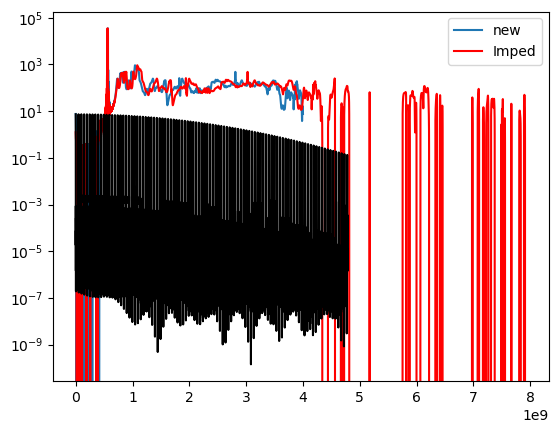

5.863939837270417e8

In [64]:
#resample impedance
Imped_section_new2=zeros(lendata_PSD+200000);
df_train=xfsection_RR[2]-xfsection_RR[1]; df_imp=xfsection_bunch[2]-xfsection_bunch[1]
dN=2# floor(df_imp/df_train)
df_gap=df_imp-df_train
for i=1:lendata_imp-1
    for j=0:Int(dN-1)
    Imped_section_new2[Int((i-1)*dN+j)+1]=Imped_section[i]+(Imped_section[i+1]-Imped_section[i])*j/dN
    end
end

Imped_section_new=circshift(Imped_section_new2[1:lendata_PSD], 51900)
plot(xfsection_RR[1:Int(lendata_PSD+1-1)],Imped_section_new[1:lendata_PSD],label="new")

plot(xfsection_bunch,Imped_section,"r-",label="Imped")
yscale("log")
legend()
length(Imped_section_new)
Imped_section_new[1]-Imped_section[1]

plot(xfsection_RR,PSDsection_RR,"k-",label="PSD")## not seeking maximum
xfsection_RR[7500]

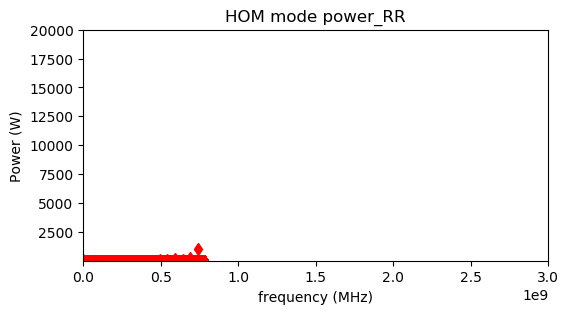

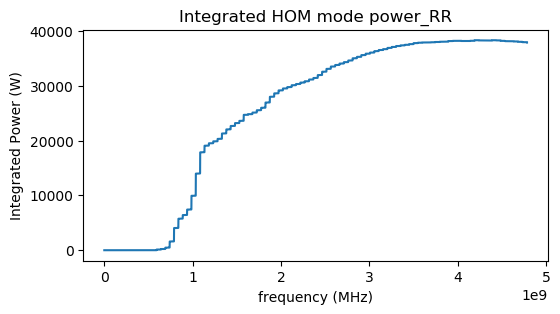

HOM power=37.85670589600248kW


In [65]:
# calculate the new HOM power
for j=1:lendata_PSD
    Powerdata_RR[j]=(Imped_section_new[j])*abs.(PSDsection_RR)[j]/1 # Note
end   

fig=figure(figsize=(6,3))
p1=plot(xfsection_RR[1:10000],real.(Powerdata_RR[1:10000]),"rd")

#yscale("log")
ylim(1e-1,2e4)
#ax2=powerplot.twinx()
#ax2.plot(f,np.real(FittedImp(f)),"b-")
#ax2.set_yscale("log", nonposx='clip',color='b')
xlim(0.00e6,3000e6)
title("HOM mode power_RR")
xlabel("frequency (MHz)")
ylabel("Power (W)")
Powerdata_RR;
istart=7500
powerInt_RR_newwake=zeros(length(xfsection_RR))
for j=(istart:length(xfsection_RR))
    powerInt_RR_newwake[j]=powerInt_RR_newwake[j-1]+Powerdata_RR[j]
end
fig=figure(figsize=(6,3))
p_flank=plot(xfsection_RR,powerInt_RR_newwake,label="newwake_power")

#xlim(1.1e9,1.18e9)
#xlim(600e6,5000e6)
title("Integrated HOM mode power_RR")
xlabel("frequency (MHz)")
ylabel("Integrated Power (W)")
length(powerInt_RR_newwake)
println("HOM power=",powerInt_RR_newwake[length(xfsection_RR)]/1e3,"kW")  # ABCI results 1908 W

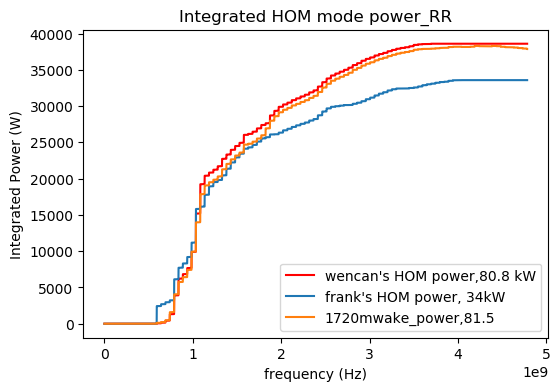

PyObject <matplotlib.legend.Legend object at 0x158b7a750>

In [66]:
fig=figure(figsize=(6,4))

plot(xfsection_RR,powerInt_RR_wencan,"r-",label="wencan's HOM power,80.8 kW")
plot(xfsection_RR,powerInt_RR_frank,label="frank's HOM power, 34kW")
p_flank=plot(xfsection_RR,powerInt_RR_newwake,label="1720mwake_power,81.5")
title("Integrated HOM mode power_RR")
xlabel("frequency (Hz)")
ylabel("Integrated Power (W)")
legend()

In [67]:
# Integraged Fundamental mode__wencan  xf_bunch1_new[1:Int(Nsampling/16/8)], Imped_newwake_real[1:Int(Nsampling/16/8)]
nend_wencan_newwake=4500
#p2=plot(xf_bunch1_new[1:Int(Nsampling/16/8)], Imped_newwake_real[1:Int(Nsampling/16/8)],"g-",label="1720m wake")
fig=figure(figsize=(6,3))
p1=plot(xf_bunch1_new[1:nend_wencan_newwake], Imped_newwake_real[1:nend_wencan_newwake],"r-",label="wencan_impedance")
legend()
title("Wencan's fundamental impedance and Int(Zimp*df) with 1720mwake")
yscale("log")
ylabel("impedance (Ohm)")
#xlim(0.5e9,0.6e9)
#ylim(1e3,1e5)
println(xf_bunch1_new[nend_wencan_newwake])

zimp_Int_wencan_newwake=zeros(nend_wencan_newwake)
for j=(2:nend_wencan_newwake)
    zimp_Int_wencan_newwake[j]=zimp_Int_wencan_newwake[j-1]+Imped_newwake_real[j]*(xf_bunch1_new[j]-xf_bunch1_new[j-1])
end
fig=figure(figsize=(6,3))
p_wencan=plot(xf_bunch1_new[1:nend_wencan_newwake],zimp_Int_wencan_newwake[1:nend_wencan_newwake],label="wencan_IntZ_newwake,Int(Zimp*df)=7.84e11")
#xlim(0.5e9,0.8e9)
xlabel("frequency (Hz)")
ylabel("Int(Zimp*df) (Ohm-Hz)")
yscale("log")
#ylim(1e11,10e11)
legend()
[pi*146*2*pi*560e6/2 zimp_Int_wencan[end]]





UndefVarError: UndefVarError: xf_bunch1_new not defined